In [12]:
import sys
import os
sys.path.append(os.path.abspath('../..'))


# from scan_engine.status_fields_config_24summ import STATUS_FIELDS_CONFIG
from status_fields_config_oct3v1_brws_250522 import STATUS_FIELDS_CONFIG

from utlis.scan_engine_utlis.scan_eng_big_utlis import log_folder_to_parquet_sep

if __name__ == "__main__":
    base_folder = "/data/big_rim/rsync_dcc_sum/Oct3V1" #"/data/big_rim/rsync_dcc_sum/24summ" #"/data/big_rim/rsync_dcc_sum/25Apri_social" #"/data/big_rim/rsync_dcc_sum/Oct3V1" #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ"  # Replace with your base folder
    # save_path = os.path.join(base_folder, 'paret')
    failed_paths_file = '/data/big_rim/rsync_dcc_sum/Oct3V1/sync_failed_brws.txt'  # File containing failed paths


    force_rescan_rec_files = [
        # ('2023-10-01', '001'),
        # ('2023-10-02', '002'),
        # Add more as needed
    ]
    rescan_threshold_days = 0.0001 # 7 days, but guess if i mess up i can just change it to automatically rescan all, smile... #0.1

    log_folder_to_parquet_sep(base_folder, failed_paths_file, STATUS_FIELDS_CONFIG,
                              force_rescan_rec_files=force_rescan_rec_files,
                              rescan_threshold_days=rescan_threshold_days)


Log for 20240819V1r2 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03/20240819V1r2/folder_log.parquet
Log for 20241217v1l23re1_p20241217v1l23BE0 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1_p20241217v1l23BE0/folder_log.parquet
Log for 20241217v1l23re1 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1/folder_log.parquet
Log for 20241001PMCRE2mini_15_22 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_22/folder_log.parquet
Log for 20241001PMCRE2mini_13_57 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_57/folder_log.parquet
Log for 20241001PMCRE2mini_13_44 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_44/folder_log.parquet
Log for 20241001PMCRE2mini_15_35 saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_35/folder_log.parquet
Log for 20241216V1RE1Fmini_p202241216V1BE1F saved at /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_

In [10]:
# sys.path.append(os.path.abspath('../..'))
from utlis.scan_engine_utlis.scan_engine_utlis import read_all_parquet_files
# base_folder = "/data/big_rim/rsync_dcc_sum/Oct3V1" 
all_df = read_all_parquet_files(base_folder)

In [13]:
import pyarrow.compute as pc
from functools import reduce


table = all_df #combined_df
# Filter mir_generate_param == 0 and sync != 3
conditions = [
   pc.equal(table['mir_generate_param'], '0'),
   pc.equal(table['sync'], '0'),
   pc.not_equal(table['sync'], '3')
]

filter_mask = reduce(pc.and_, conditions)



# Apply the filter and print the results
filtered_table = table.filter(filter_mask)

# Print each row of the filtered table
print(filtered_table.to_pandas())  # This will display the filtered data in a familiar pandas-like format


    mir_generate_param sync mini_6cam_map dropf_handle com social miniscope  \
0                    0    0             0            0   0      0         1   
1                    0    0             0            0   0      0         1   
2                    0    0             0            0   0      0         1   
3                    0    0             0            0   0      1         1   
4                    0    0             0            0   0      1         1   
..                 ...  ...           ...          ...  ..    ...       ...   
98                   0    0             0            0   0      0         1   
99                   0    0             0            0   0      1         1   
100                  0    0             0            0   0      1         1   
101                  0    0             0            0   0      0         1   
102                  0    0             0            0   0      0         1   

    test after_oxytocin before_oxytocin dannce mini

In [15]:
from utlis.exe_engine_utlis.comb_all_exe import sequential_process_and_update_mirgenparam

sequential_process_and_update_mirgenparam(filtered_table, base_folder)

Found 6 calibration files.
Frame count: 27900
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam1_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam2_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam3_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam4_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam5_params.mat
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hires_cam6_params.mat
Data saved to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/2024_09_18_20240819_V1_r1_calib_before_label3d_dannce.mat
mir_generate_param ran successfully.
Updated Parquet file at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/folder_log.parquet with new status.
Found 6 calibration files.
Frame count: 27900
Processed /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/calib_before/hi

Processing: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1


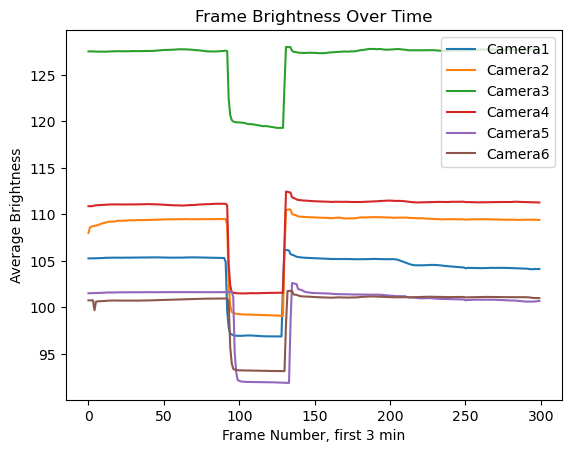

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1: {'Camera1': [92], 'Camera2': [93, 94], 'Camera3': [93], 'Camera4': [93, 94], 'Camera5': [97, 98], 'Camera6': [94]}
Processed drop frames: {'Camera1': 92, 'Camera2': 94, 'Camera3': 93, 'Camera4': 94, 'Camera5': 98, 'Camera6': 94}
92
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/df_synced_2024_09_18_20240819_V1_r1_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/2024_09_18_20240819_V1_r1_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/2024_09_18_20240819_V1_r1_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1/prev_calib
Sync ran successfully.
Updated Parquet file at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_

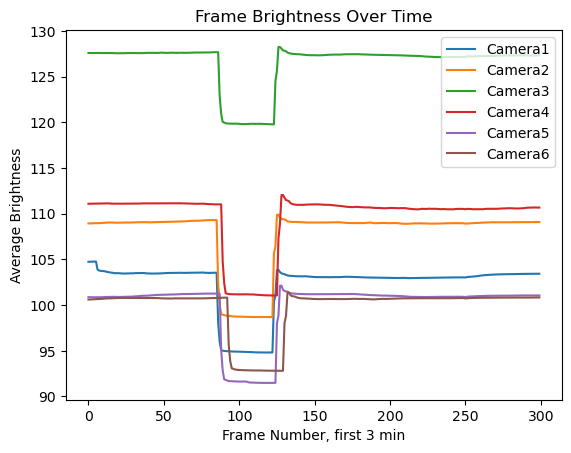

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1_2: {'Camera1': [86, 87], 'Camera2': [86, 87], 'Camera3': [87, 88], 'Camera4': [89, 90], 'Camera5': [88, 89], 'Camera6': [93]}
Processed drop frames: {'Camera1': 87, 'Camera2': 87, 'Camera3': 88, 'Camera4': 90, 'Camera5': 89, 'Camera6': 93}
87
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1_2/df_synced_2024_09_18_20240819_V1_r1_2_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1_2 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1_2/2024_09_18_20240819_V1_r1_2_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1_2/2024_09_18_20240819_V1_r1_2_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_09_18/20240819_V1_r1_2/prev_calib
Sync ran successfully.
Updated Parquet file at /data/big_rim/

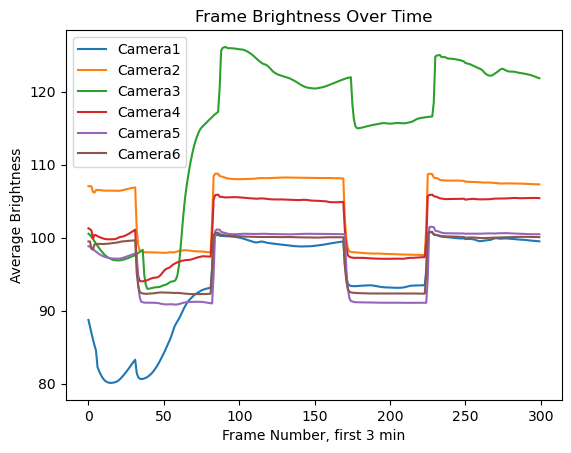

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03/20240819V1r2: {'Camera1': [6, 170], 'Camera2': [32, 33, 170, 171], 'Camera3': [37, 175, 176], 'Camera4': [32, 170, 171], 'Camera5': [33, 171, 172], 'Camera6': [32, 170, 171]}
Processed drop frames: {'Camera1': 6, 'Camera2': 33, 'Camera3': 37, 'Camera4': 32, 'Camera5': 33, 'Camera6': 32}
6
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03/20240819V1r2/df_synced_2024_10_03_20240819V1r2_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03/20240819V1r2 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03/20240819V1r2/2024_10_03_20240819V1r2_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03/20240819V1r2/2024_10_03_20240819V1r2_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03/20240819V1r2/prev_calib
Sync ran successfully.
Updated Parquet file at /data/big_rim/

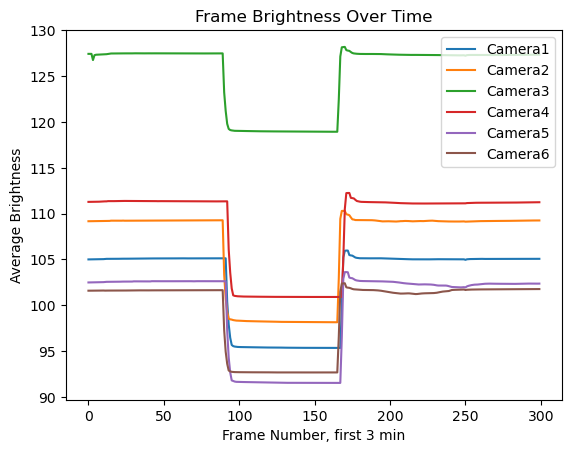

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_bleach_2mice: {'Camera1': [92, 93], 'Camera2': [90, 91], 'Camera3': [90, 91], 'Camera4': [93, 94], 'Camera5': [92, 93], 'Camera6': [90, 91]}
Processed drop frames: {'Camera1': 93, 'Camera2': 91, 'Camera3': 91, 'Camera4': 94, 'Camera5': 93, 'Camera6': 91}
91
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_bleach_2mice/df_synced_2024_10_03_micecolor_test_24Anshu_f_bleach_2mice_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_bleach_2mice with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_bleach_2mice/2024_10_03_micecolor_test_24Anshu_f_bleach_2mice_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_bleach_2mice/2024_10_03_micecolor_test_24Anshu_f_bleach_2mic

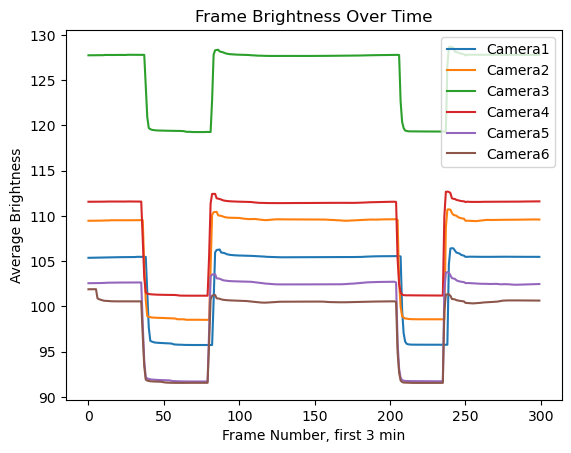

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice: {'Camera1': [39, 40, 208, 209], 'Camera2': [37, 38, 206, 207], 'Camera3': [38, 39, 207, 208], 'Camera4': [36, 37, 205, 206], 'Camera5': [36, 37, 205, 206], 'Camera6': [36, 37, 205, 206]}
Processed drop frames: {'Camera1': 40, 'Camera2': 38, 'Camera3': 39, 'Camera4': 37, 'Camera5': 37, 'Camera6': 37}
37
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice/df_synced_2024_10_03_micecolor_test_24Anshu_f_paint_2mice_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice/2024_10_03_micecolor_test_24Anshu_f_paint_2mice_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_

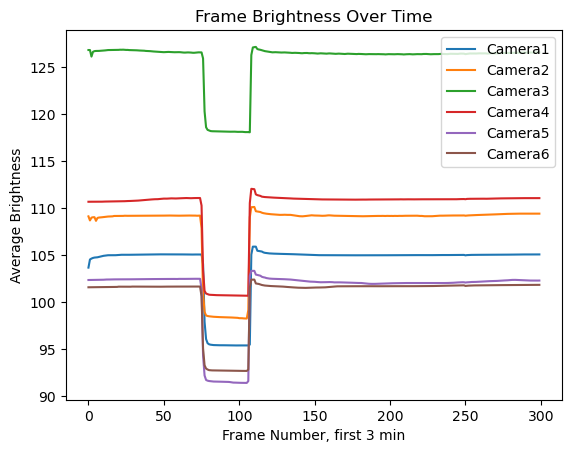

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice_2: {'Camera1': [77], 'Camera2': [76, 77], 'Camera3': [77], 'Camera4': [76, 77], 'Camera5': [76, 77], 'Camera6': [76]}
Processed drop frames: {'Camera1': 77, 'Camera2': 77, 'Camera3': 77, 'Camera4': 77, 'Camera5': 77, 'Camera6': 76}
76
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice_2/df_synced_2024_10_03_micecolor_test_24Anshu_f_paint_2mice_2_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice_2 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice_2/2024_10_03_micecolor_test_24Anshu_f_paint_2mice_2_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_03_micecolor_test/24Anshu_f_paint_2mice_2/2024_10_03_micecolor_test_24Anshu_f_paint_2mice_2_ca

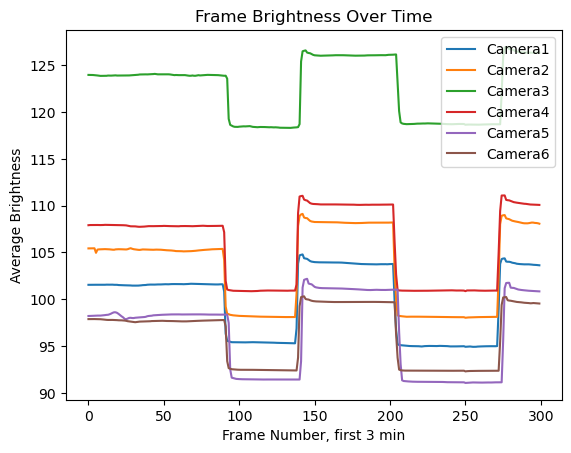

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1: {'Camera1': [91, 203, 204], 'Camera2': [91, 203, 204], 'Camera3': [93, 205, 206], 'Camera4': [91, 203, 204], 'Camera5': [94, 206, 207], 'Camera6': [92, 204, 205]}
Processed drop frames: {'Camera1': 91, 'Camera2': 91, 'Camera3': 93, 'Camera4': 91, 'Camera5': 94, 'Camera6': 92}
91
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1/df_synced_2024_10_04_20240819V1r1_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1/2024_10_04_20240819V1r1_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1/2024_10_04_20240819V1r1_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1/prev_calib
Sync ran successfully.
Updated Parquet file at /data/big_

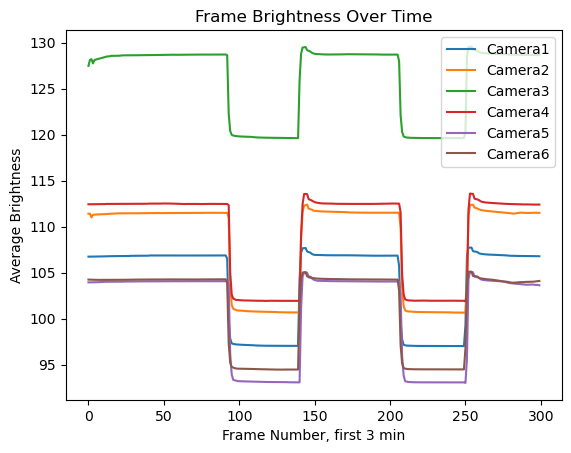

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_20_10: {'Camera1': [93, 94, 207], 'Camera2': [94, 95, 208, 209], 'Camera3': [93, 207], 'Camera4': [94, 95, 208, 209], 'Camera5': [94, 95, 208, 209], 'Camera6': [93, 94, 207]}
Processed drop frames: {'Camera1': 94, 'Camera2': 95, 'Camera3': 93, 'Camera4': 95, 'Camera5': 95, 'Camera6': 94}
93
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_20_10/df_synced_2024_10_04_20240819V1r1_20_10_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_20_10 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_20_10/2024_10_04_20240819V1r1_20_10_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_20_10/2024_10_04_20240819V1r1_20_10_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_20_10/prev_cali

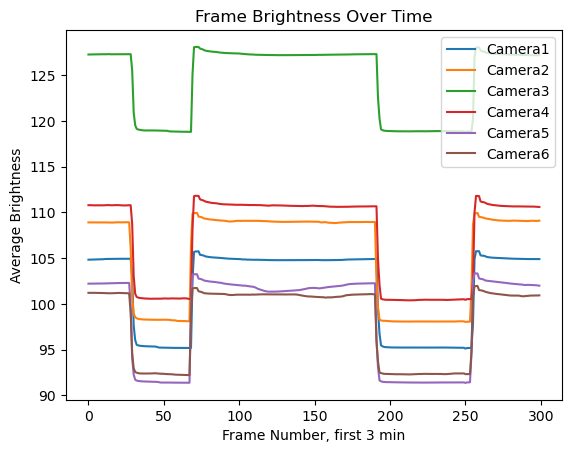

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_05: {'Camera1': [29, 30, 192, 193], 'Camera2': [28, 29, 191, 192], 'Camera3': [30, 192, 193], 'Camera4': [29, 30, 192, 193], 'Camera5': [28, 29, 191, 192], 'Camera6': [28, 29, 191, 192]}
Processed drop frames: {'Camera1': 30, 'Camera2': 29, 'Camera3': 30, 'Camera4': 30, 'Camera5': 29, 'Camera6': 29}
29
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_05/df_synced_2024_10_04_20240819V1r1_21_05_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_05 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_05/2024_10_04_20240819V1r1_21_05_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_05/2024_10_04_20240819V1r1_21_05_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_

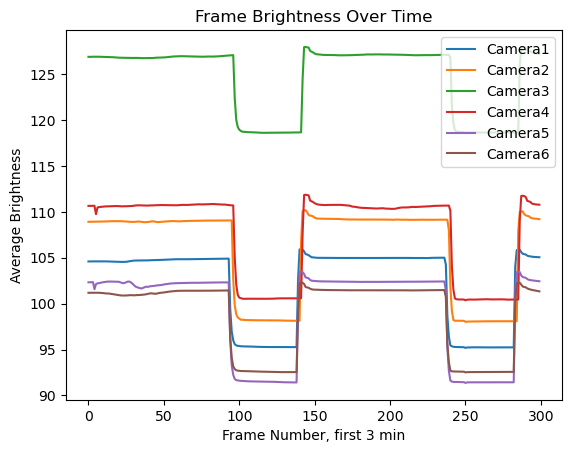

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_40: {'Camera1': [94, 95, 238, 239], 'Camera2': [96, 97, 240, 241], 'Camera3': [97, 98, 241, 242], 'Camera4': [97, 98, 241, 242], 'Camera5': [94, 95, 238, 239], 'Camera6': [94, 95, 238, 239]}
Processed drop frames: {'Camera1': 95, 'Camera2': 97, 'Camera3': 98, 'Camera4': 98, 'Camera5': 95, 'Camera6': 95}
95
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_40/df_synced_2024_10_04_20240819V1r1_21_40_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_40 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_40/2024_10_04_20240819V1r1_21_40_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V1r1_21_40/2024_10_04_20240819V1r1_21_40_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240819V

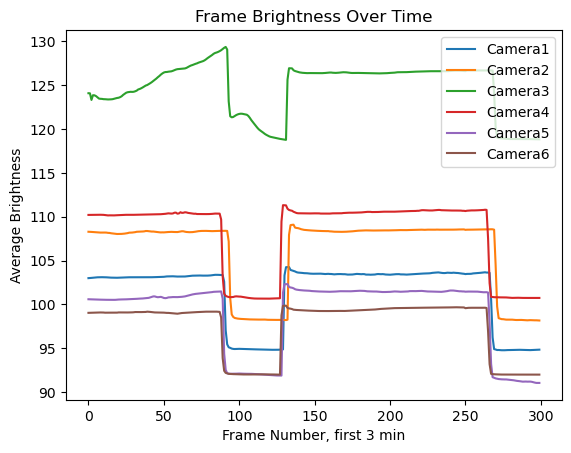

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r1: {'Camera1': [91, 267, 268], 'Camera2': [94, 270, 271], 'Camera3': [93, 269, 270], 'Camera4': [89, 90, 265, 266], 'Camera5': [90, 266, 267], 'Camera6': [89, 265, 266]}
Processed drop frames: {'Camera1': 91, 'Camera2': 94, 'Camera3': 93, 'Camera4': 90, 'Camera5': 90, 'Camera6': 89}
89
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r1/df_synced_2024_10_04_20240916V1r1_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r1 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r1/2024_10_04_20240916V1r1_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r1/2024_10_04_20240916V1r1_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r1/prev_calib
Sync ran successfully.
Updated Parquet file at /data/

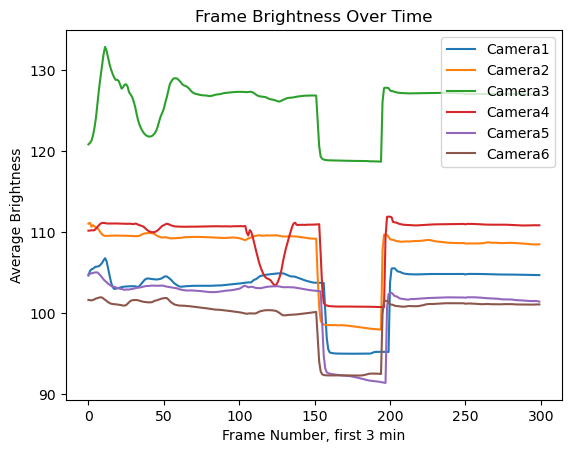

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r2: {'Camera1': [157, 158], 'Camera2': [152, 153], 'Camera3': [152, 153], 'Camera4': [154, 155], 'Camera5': [155, 156], 'Camera6': [152, 153]}
Processed drop frames: {'Camera1': 158, 'Camera2': 153, 'Camera3': 153, 'Camera4': 155, 'Camera5': 156, 'Camera6': 153}
153
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r2/df_synced_2024_10_04_20240916V1r2_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r2 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r2/2024_10_04_20240916V1r2_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r2/2024_10_04_20240916V1r2_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_04/20240916V1r2/prev_calib
Sync ran successfully.
Updated Parquet file at /data/big_rim/rsync_dcc_sum

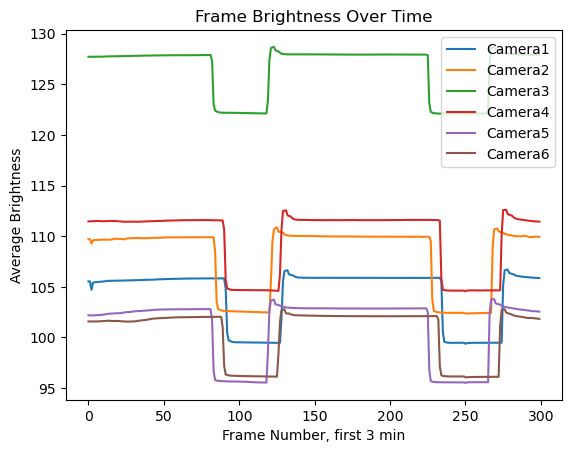

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_15_05_30min: {'Camera1': [92, 235], 'Camera2': [85, 228], 'Camera3': [83, 226], 'Camera4': [91, 234], 'Camera5': [83, 226], 'Camera6': [90, 233]}
Processed drop frames: {'Camera1': 92, 'Camera2': 85, 'Camera3': 83, 'Camera4': 91, 'Camera5': 83, 'Camera6': 90}
83
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_15_05_30min/df_synced_2024_10_07_20240916v1r1_15_05_30min_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_15_05_30min with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_15_05_30min/2024_10_07_20240916v1r1_15_05_30min_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_15_05_30min/2024_10_07_20240916v1r1_15_05_30min_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_15

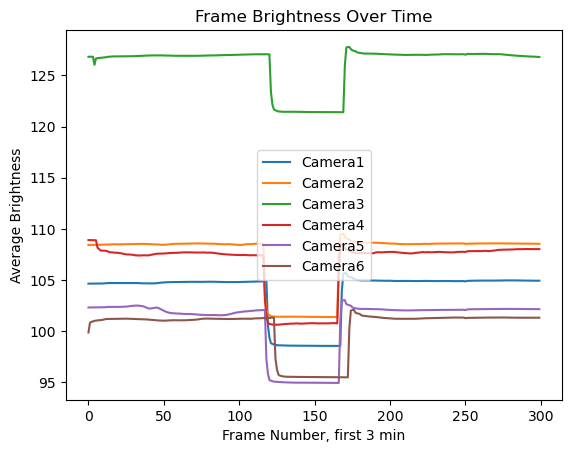

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_17_55: {'Camera1': [119], 'Camera2': [117], 'Camera3': [121], 'Camera4': [117], 'Camera5': [118], 'Camera6': [124]}
Processed drop frames: {'Camera1': 119, 'Camera2': 117, 'Camera3': 121, 'Camera4': 117, 'Camera5': 118, 'Camera6': 124}
117
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_17_55/df_synced_2024_10_07_20240916v1r1_17_55_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_17_55 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_17_55/2024_10_07_20240916v1r1_17_55_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_17_55/2024_10_07_20240916v1r1_17_55_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_07/20240916v1r1_17_55/prev_calib
Sync ran successfully.
Updated Parquet file at /da

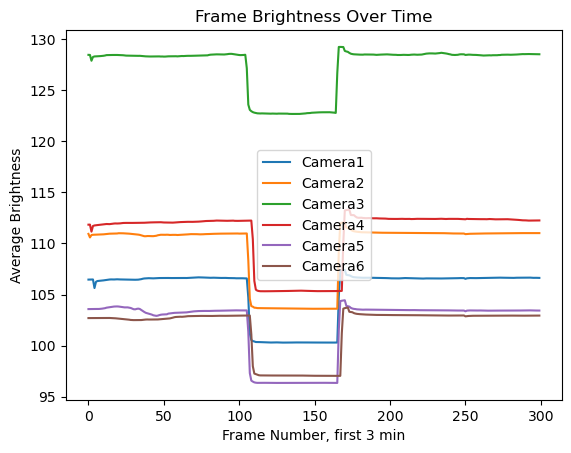

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_19_44: {'Camera1': [107], 'Camera2': [106, 107], 'Camera3': [106], 'Camera4': [110], 'Camera5': [106, 107], 'Camera6': [109]}
Processed drop frames: {'Camera1': 107, 'Camera2': 107, 'Camera3': 106, 'Camera4': 110, 'Camera5': 107, 'Camera6': 109}
106
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_19_44/df_synced_2024_10_08_20240819V1r1_19_44_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_19_44 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_19_44/2024_10_08_20240819V1r1_19_44_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_19_44/2024_10_08_20240819V1r1_19_44_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_19_44/prev_calib
Sync ran successfully.
Updated Parquet f

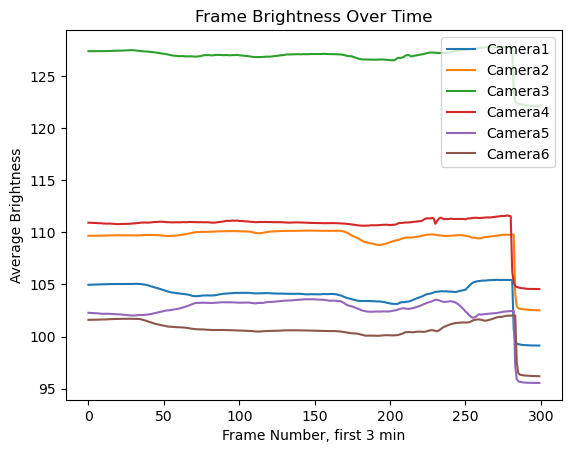

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_00: {'Camera1': [282], 'Camera2': [283], 'Camera3': [282], 'Camera4': [281], 'Camera5': [283], 'Camera6': [284]}
Processed drop frames: {'Camera1': 282, 'Camera2': 283, 'Camera3': 282, 'Camera4': 281, 'Camera5': 283, 'Camera6': 284}
281
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_00/df_synced_2024_10_08_20240819V1r1_20_00_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_00 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_00/2024_10_08_20240819V1r1_20_00_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_00/2024_10_08_20240819V1r1_20_00_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_00/prev_calib
Sync ran successfully.
Updated Parquet file at /da

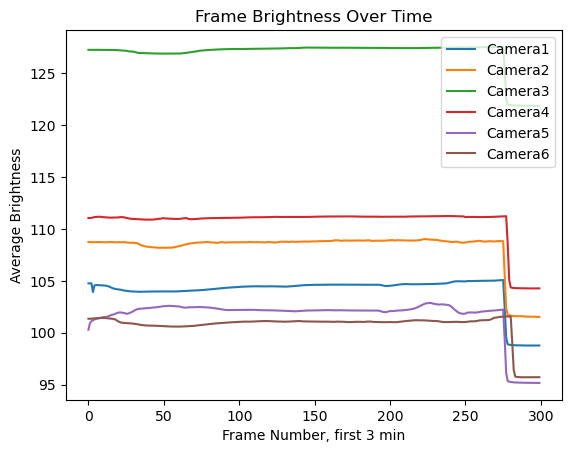

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_17: {'Camera1': [276, 277], 'Camera2': [276, 277], 'Camera3': [276, 277], 'Camera4': [278, 279], 'Camera5': [276, 277], 'Camera6': [281, 282]}
Processed drop frames: {'Camera1': 277, 'Camera2': 277, 'Camera3': 277, 'Camera4': 279, 'Camera5': 277, 'Camera6': 282}
277
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_17/df_synced_2024_10_08_20240819V1r1_20_17_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_17 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_17/2024_10_08_20240819V1r1_20_17_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_17/2024_10_08_20240819V1r1_20_17_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_17/prev_calib
Sync ran successfull

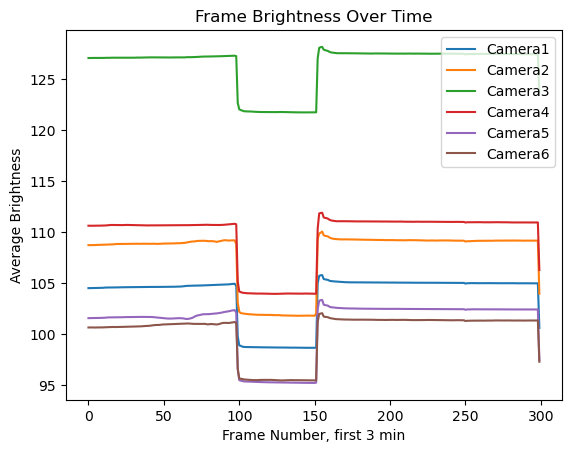

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_32: {'Camera1': [99, 299], 'Camera2': [99, 299], 'Camera3': [99, 299], 'Camera4': [99, 299], 'Camera5': [99, 299], 'Camera6': [99, 299]}
Processed drop frames: {'Camera1': 99, 'Camera2': 99, 'Camera3': 99, 'Camera4': 99, 'Camera5': 99, 'Camera6': 99}
99
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_32/df_synced_2024_10_08_20240819V1r1_20_32_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_32 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_32/2024_10_08_20240819V1r1_20_32_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_32/2024_10_08_20240819V1r1_20_32_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240819V1r1_20_32/prev_calib
Sync ran successfully.
Updated Pa

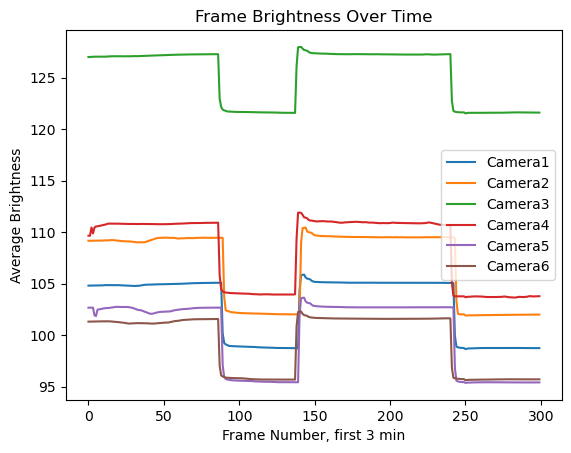

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_20: {'Camera1': [89, 243], 'Camera2': [90, 244], 'Camera3': [87, 241], 'Camera4': [87, 241], 'Camera5': [89, 243], 'Camera6': [87, 241]}
Processed drop frames: {'Camera1': 89, 'Camera2': 90, 'Camera3': 87, 'Camera4': 87, 'Camera5': 89, 'Camera6': 87}
87
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_20/df_synced_2024_10_08_20240916v1r1_14_20_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_20 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_20/2024_10_08_20240916v1r1_14_20_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_20/2024_10_08_20240916v1r1_14_20_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_20/prev_calib
Sync ran successfully.
Updated Pa

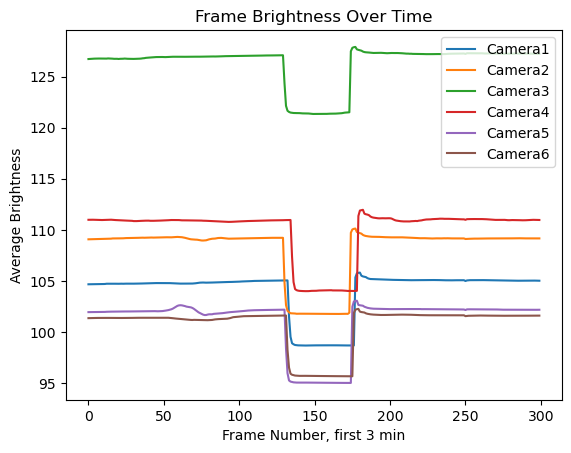

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_40: {'Camera1': [133], 'Camera2': [130, 131], 'Camera3': [130, 131], 'Camera4': [135, 136], 'Camera5': [131, 132], 'Camera6': [132]}
Processed drop frames: {'Camera1': 133, 'Camera2': 131, 'Camera3': 131, 'Camera4': 136, 'Camera5': 132, 'Camera6': 132}
131
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_40/df_synced_2024_10_08_20240916v1r1_14_40_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_40 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_40/2024_10_08_20240916v1r1_14_40_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_40/2024_10_08_20240916v1r1_14_40_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_14_40/prev_calib
Sync ran successfully.
Updated

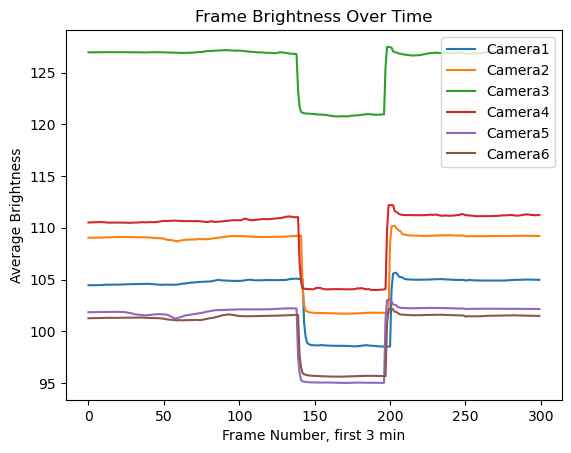

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_15_35: {'Camera1': [143], 'Camera2': [142], 'Camera3': [139], 'Camera4': [140], 'Camera5': [139], 'Camera6': [140]}
Processed drop frames: {'Camera1': 143, 'Camera2': 142, 'Camera3': 139, 'Camera4': 140, 'Camera5': 139, 'Camera6': 140}
139
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_15_35/df_synced_2024_10_08_20240916v1r1_15_35_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_15_35 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_15_35/2024_10_08_20240916v1r1_15_35_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_15_35/2024_10_08_20240916v1r1_15_35_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_08/20240916v1r1_15_35/prev_calib
Sync ran successfully.
Updated Parquet file at /da

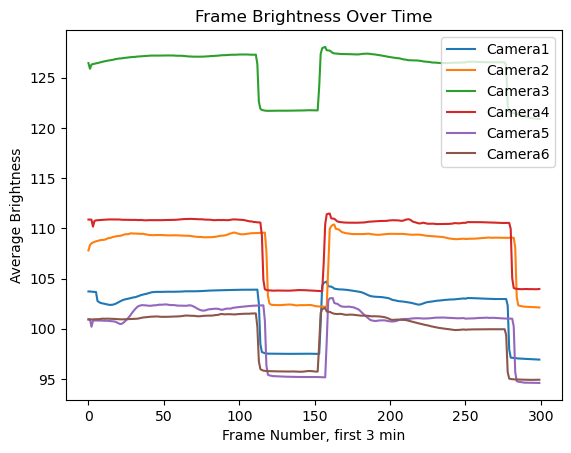

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_14_53: {'Camera1': [114, 279], 'Camera2': [119, 284], 'Camera3': [113, 278], 'Camera4': [116, 281], 'Camera5': [118, 283], 'Camera6': [113, 278]}
Processed drop frames: {'Camera1': 114, 'Camera2': 119, 'Camera3': 113, 'Camera4': 116, 'Camera5': 118, 'Camera6': 113}
113
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_14_53/df_synced_2024_10_14_20240916v1r1_14_53_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_14_53 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_14_53/2024_10_14_20240916v1r1_14_53_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_14_53/2024_10_14_20240916v1r1_14_53_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_14_53/prev_calib
Sync ran successfull

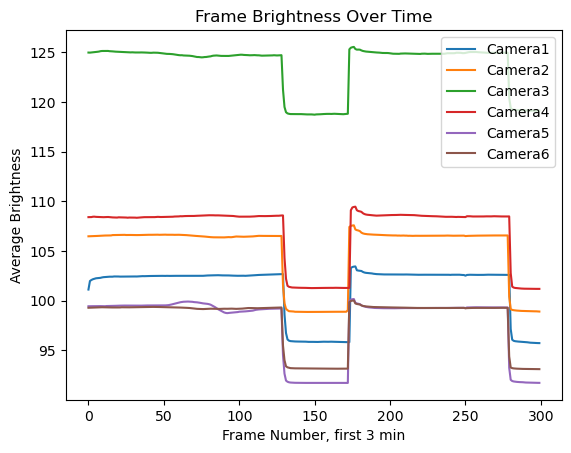

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_35: {'Camera1': [130, 280], 'Camera2': [129, 279], 'Camera3': [129, 279], 'Camera4': [130, 131, 280], 'Camera5': [129, 279], 'Camera6': [129, 279]}
Processed drop frames: {'Camera1': 130, 'Camera2': 129, 'Camera3': 129, 'Camera4': 131, 'Camera5': 129, 'Camera6': 129}
129
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_35/df_synced_2024_10_14_20240916v1r1_16_35_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_35 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_35/2024_10_14_20240916v1r1_16_35_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_35/2024_10_14_20240916v1r1_16_35_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_35/prev_calib
Sync ran succes

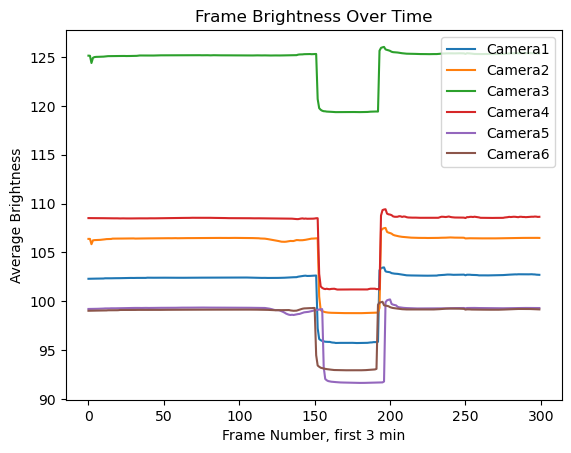

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37: {'Camera1': [152], 'Camera2': [153], 'Camera3': [152], 'Camera4': [153], 'Camera5': [156], 'Camera6': [151]}
Processed drop frames: {'Camera1': 152, 'Camera2': 153, 'Camera3': 152, 'Camera4': 153, 'Camera5': 156, 'Camera6': 151}
151
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37/df_synced_2024_10_14_20240916v1r1_16_37_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37/2024_10_14_20240916v1r1_16_37_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37/2024_10_14_20240916v1r1_16_37_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_37/prev_calib
Sync ran successfully.
Updated Parquet file at /da

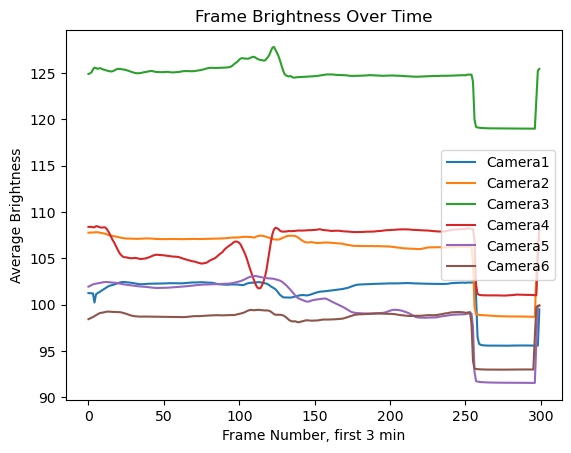

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_53: {'Camera1': [258], 'Camera2': [256], 'Camera3': [256], 'Camera4': [257], 'Camera5': [256], 'Camera6': [255]}
Processed drop frames: {'Camera1': 258, 'Camera2': 256, 'Camera3': 256, 'Camera4': 257, 'Camera5': 256, 'Camera6': 255}
255
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_53/df_synced_2024_10_14_20240916v1r1_16_53_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_53 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_53/2024_10_14_20240916v1r1_16_53_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_53/2024_10_14_20240916v1r1_16_53_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r1_16_53/prev_calib
Sync ran successfully.
Updated Parquet file at /da

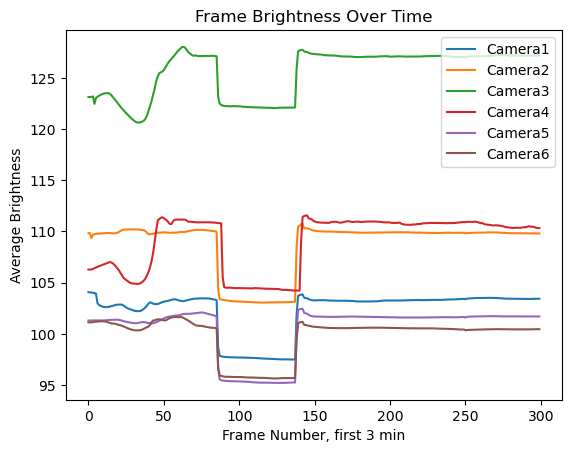

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30: {'Camera1': [86], 'Camera2': [86], 'Camera3': [86], 'Camera4': [89], 'Camera5': [86], 'Camera6': [86]}
Processed drop frames: {'Camera1': 86, 'Camera2': 86, 'Camera3': 86, 'Camera4': 89, 'Camera5': 86, 'Camera6': 86}
86
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30/df_synced_2024_10_14_20240916v1r2_14_30_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30/2024_10_14_20240916v1r2_14_30_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30/2024_10_14_20240916v1r2_14_30_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_14_30/prev_calib
Sync ran successfully.
Updated Parquet file at /data/big_rim/rs

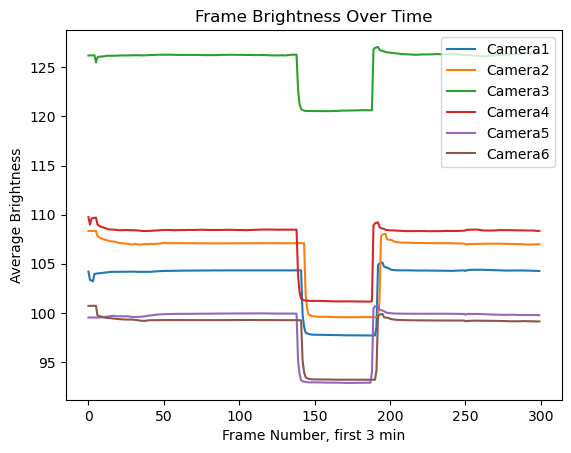

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58: {'Camera1': [142], 'Camera2': [144], 'Camera3': [139], 'Camera4': [139], 'Camera5': [139], 'Camera6': [142]}
Processed drop frames: {'Camera1': 142, 'Camera2': 144, 'Camera3': 139, 'Camera4': 139, 'Camera5': 139, 'Camera6': 142}
139
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58/df_synced_2024_10_14_20240916v1r2_15_58_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58/2024_10_14_20240916v1r2_15_58_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58/2024_10_14_20240916v1r2_15_58_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_14/20240916v1r2_15_58/prev_calib
Sync ran successfully.
Updated Parquet file at /da

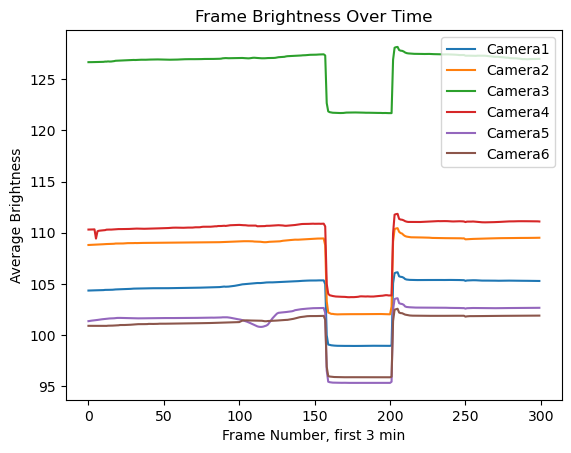

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_13_41: {'Camera1': [158], 'Camera2': [158], 'Camera3': [158], 'Camera4': [158], 'Camera5': [158], 'Camera6': [158]}
Processed drop frames: {'Camera1': 158, 'Camera2': 158, 'Camera3': 158, 'Camera4': 158, 'Camera5': 158, 'Camera6': 158}
158
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_13_41/df_synced_2024_10_17_20240819V1r1_13_41_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_13_41 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_13_41/2024_10_17_20240819V1r1_13_41_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_13_41/2024_10_17_20240819V1r1_13_41_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_13_41/prev_calib
Sync ran successfully.
Updated Parquet file at /da

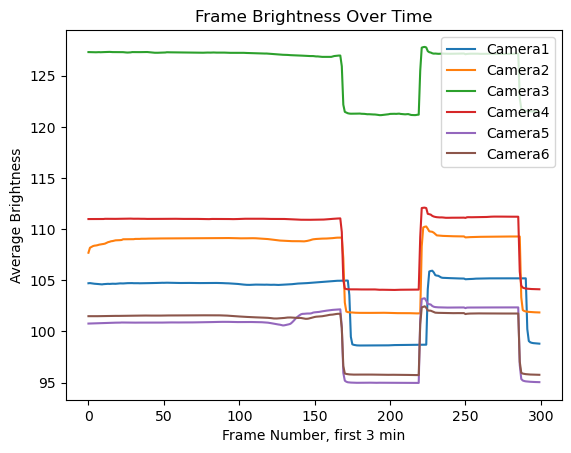

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_14_25: {'Camera1': [174, 291], 'Camera2': [169, 170, 287], 'Camera3': [169, 286], 'Camera4': [169, 286], 'Camera5': [169, 286], 'Camera6': [169, 286]}
Processed drop frames: {'Camera1': 174, 'Camera2': 170, 'Camera3': 169, 'Camera4': 169, 'Camera5': 169, 'Camera6': 169}
169
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_14_25/df_synced_2024_10_17_20240819V1r1_14_25_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_14_25 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_14_25/2024_10_17_20240819V1r1_14_25_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_14_25/2024_10_17_20240819V1r1_14_25_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_17/20240819V1r1_14_25/prev_calib
Sync ran succes

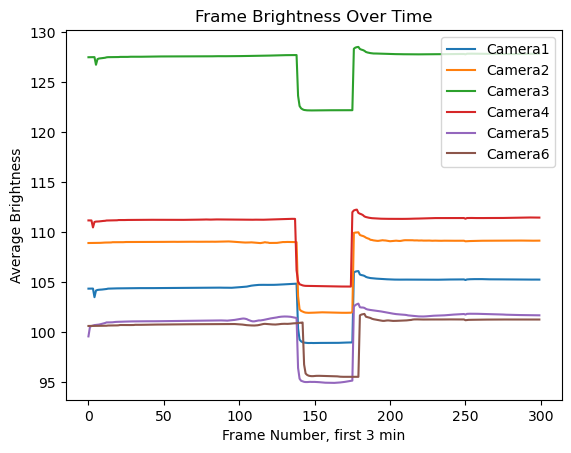

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_15_07: {'Camera1': [139], 'Camera2': [139], 'Camera3': [139], 'Camera4': [138], 'Camera5': [139], 'Camera6': [143]}
Processed drop frames: {'Camera1': 139, 'Camera2': 139, 'Camera3': 139, 'Camera4': 138, 'Camera5': 139, 'Camera6': 143}
138
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_15_07/df_synced_2024_10_24_20241001PMCr2_15_07_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_15_07 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_15_07/2024_10_24_20241001PMCr2_15_07_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_15_07/2024_10_24_20241001PMCr2_15_07_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_15_07/prev_calib
Sync ran successfully.
Updated Parquet fi

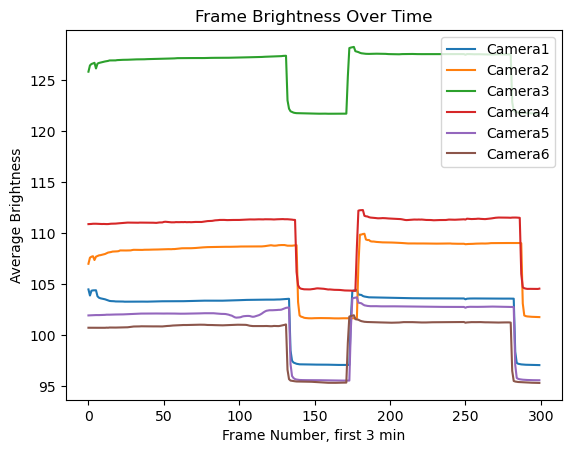

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_16_19: {'Camera1': [134, 283], 'Camera2': [139, 288], 'Camera3': [132, 281], 'Camera4': [138, 287], 'Camera5': [134, 283], 'Camera6': [132, 281]}
Processed drop frames: {'Camera1': 134, 'Camera2': 139, 'Camera3': 132, 'Camera4': 138, 'Camera5': 134, 'Camera6': 132}
132
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_16_19/df_synced_2024_10_24_20241001PMCr2_16_19_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_16_19 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_16_19/2024_10_24_20241001PMCr2_16_19_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_16_19/2024_10_24_20241001PMCr2_16_19_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241001PMCr2_16_19/prev_calib
Sync ran su

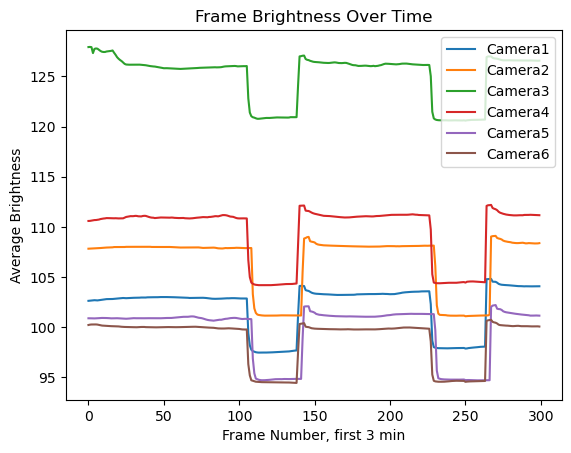

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241002PMCr1_left1_: {'Camera1': [106, 228], 'Camera2': [109, 230, 231], 'Camera3': [106, 228], 'Camera4': [106, 228], 'Camera5': [109, 231], 'Camera6': [106, 228]}
Processed drop frames: {'Camera1': 106, 'Camera2': 109, 'Camera3': 106, 'Camera4': 106, 'Camera5': 109, 'Camera6': 106}
106
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241002PMCr1_left1_/df_synced_2024_10_24_20241002PMCr1_left1__calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241002PMCr1_left1_ with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241002PMCr1_left1_/2024_10_24_20241002PMCr1_left1__calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241002PMCr1_left1_/2024_10_24_20241002PMCr1_left1__calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/20241002PMCr1_left1_/prev_cal

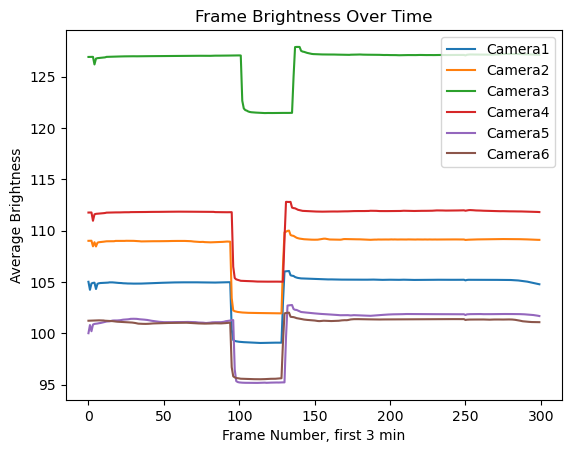

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/202420717PMCr1_: {'Camera1': [95], 'Camera2': [95], 'Camera3': [102], 'Camera4': [96], 'Camera5': [97], 'Camera6': [95]}
Processed drop frames: {'Camera1': 95, 'Camera2': 95, 'Camera3': 102, 'Camera4': 96, 'Camera5': 97, 'Camera6': 95}
95
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/202420717PMCr1_/df_synced_2024_10_24_202420717PMCr1__calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/202420717PMCr1_ with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/202420717PMCr1_/2024_10_24_202420717PMCr1__calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/202420717PMCr1_/2024_10_24_202420717PMCr1__calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_24/202420717PMCr1_/prev_calib
Sync ran successfully.
Updated Parquet file at /data/big_rim/rsync_dcc_sum/Oct3V1/2024_1

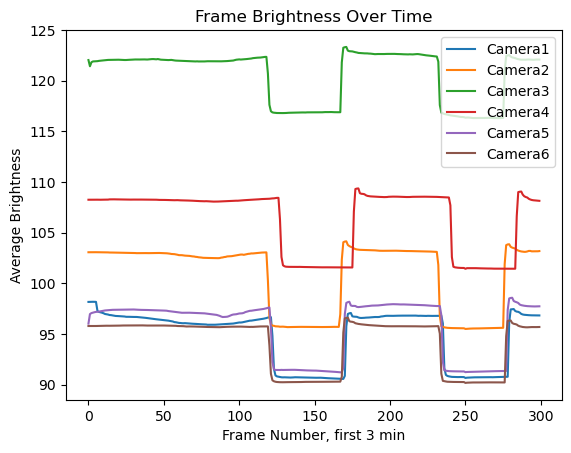

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20240916v1r2_14_30: {'Camera1': [123, 236], 'Camera2': [119, 120, 233], 'Camera3': [120, 233], 'Camera4': [127, 128, 241], 'Camera5': [121, 122, 235], 'Camera6': [121, 234]}
Processed drop frames: {'Camera1': 123, 'Camera2': 120, 'Camera3': 120, 'Camera4': 128, 'Camera5': 122, 'Camera6': 121}
120
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20240916v1r2_14_30/df_synced_2024_10_25_20240916v1r2_14_30_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20240916v1r2_14_30 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20240916v1r2_14_30/2024_10_25_20240916v1r2_14_30_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20240916v1r2_14_30/2024_10_25_20240916v1r2_14_30_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20240916v1r2_14_30/prev_calib
Sync 

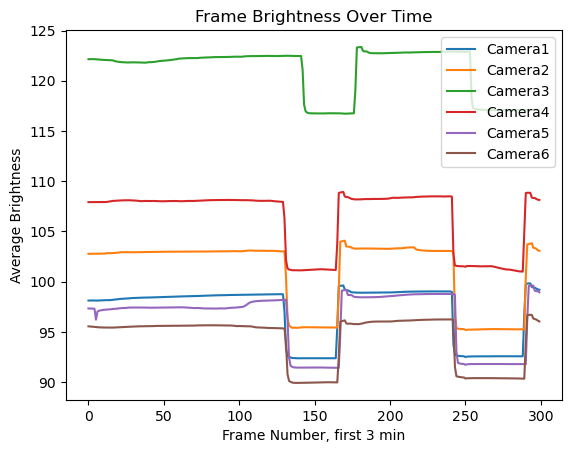

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr1_14_54: {'Camera1': [131, 242], 'Camera2': [131, 132, 243], 'Camera3': [143, 254], 'Camera4': [131, 242], 'Camera5': [133, 244], 'Camera6': [132, 243]}
Processed drop frames: {'Camera1': 131, 'Camera2': 132, 'Camera3': 143, 'Camera4': 131, 'Camera5': 133, 'Camera6': 132}
131
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr1_14_54/df_synced_2024_10_25_20241002PMCr1_14_54_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr1_14_54 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr1_14_54/2024_10_25_20241002PMCr1_14_54_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr1_14_54/2024_10_25_20241002PMCr1_14_54_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr1_14_54/prev_calib
Sync r

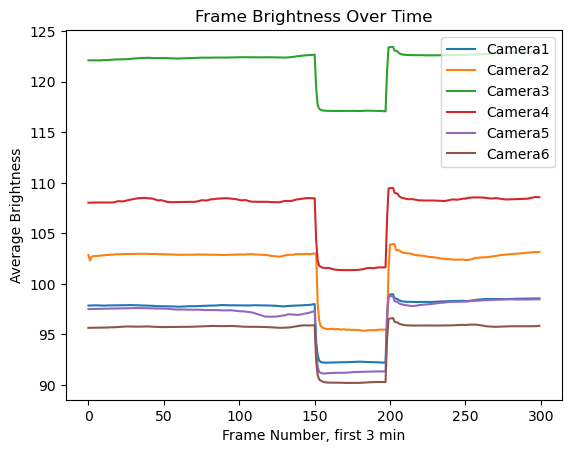

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42: {'Camera1': [151], 'Camera2': [152], 'Camera3': [151], 'Camera4': [151, 152], 'Camera5': [151], 'Camera6': [151]}
Processed drop frames: {'Camera1': 151, 'Camera2': 152, 'Camera3': 151, 'Camera4': 152, 'Camera5': 151, 'Camera6': 151}
151
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42/df_synced_2024_10_25_20241002PMCr2_15_42_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42/2024_10_25_20241002PMCr2_15_42_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42/2024_10_25_20241002PMCr2_15_42_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_15_42/prev_calib
Sync ran successfully.
Updated Parqu

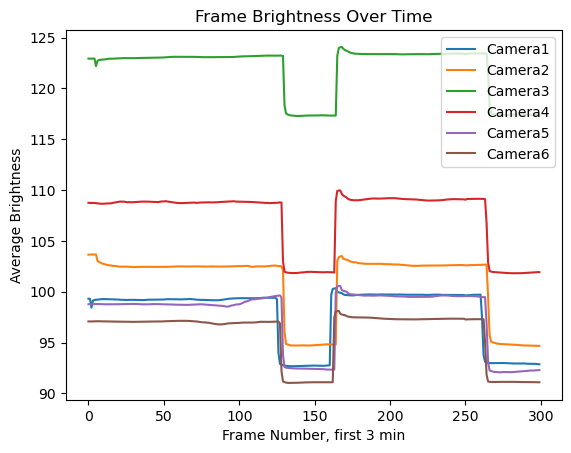

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_16_25: {'Camera1': [126, 261, 262], 'Camera2': [130, 265, 266], 'Camera3': [130, 266], 'Camera4': [129, 264, 265], 'Camera5': [129, 264, 265], 'Camera6': [128, 263, 264]}
Processed drop frames: {'Camera1': 126, 'Camera2': 130, 'Camera3': 130, 'Camera4': 129, 'Camera5': 129, 'Camera6': 128}
126
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_16_25/df_synced_2024_10_25_20241002PMCr2_16_25_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_16_25 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_16_25/2024_10_25_20241002PMCr2_16_25_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_16_25/2024_10_25_20241002PMCr2_16_25_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_16_

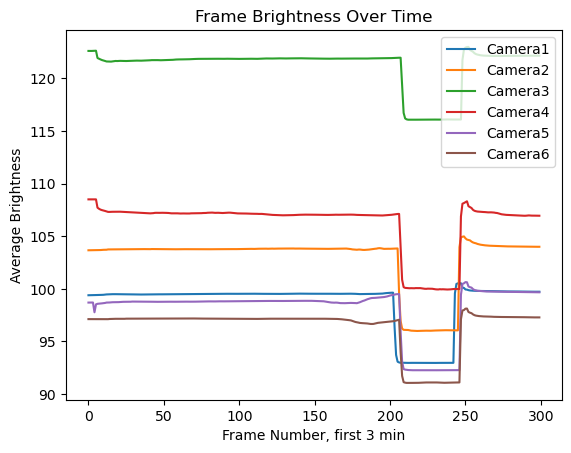

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05: {'Camera1': [203, 204], 'Camera2': [206, 207], 'Camera3': [208, 209], 'Camera4': [207, 208], 'Camera5': [207, 208], 'Camera6': [207, 208]}
Processed drop frames: {'Camera1': 204, 'Camera2': 207, 'Camera3': 209, 'Camera4': 208, 'Camera5': 208, 'Camera6': 208}
204
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05/df_synced_2024_10_25_20241002PMCr2_17_05_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05/2024_10_25_20241002PMCr2_17_05_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05/2024_10_25_20241002PMCr2_17_05_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/20241002PMCr2_17_05/prev_calib
Sync ran su

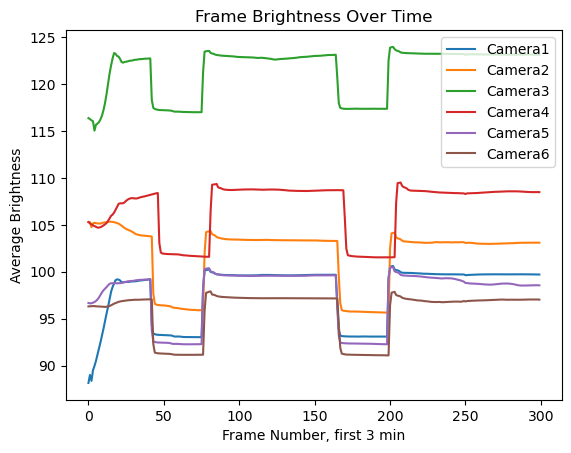

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test: {'Camera1': [42, 165, 166], 'Camera2': [43, 166, 167], 'Camera3': [42, 165, 166], 'Camera4': [47, 170, 171], 'Camera5': [42, 165, 166], 'Camera6': [43, 166, 167]}
Processed drop frames: {'Camera1': 42, 'Camera2': 43, 'Camera3': 42, 'Camera4': 47, 'Camera5': 42, 'Camera6': 43}
42
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test/df_synced_2024_10_25_2male_mice_test_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test/2024_10_25_2male_mice_test_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test/2024_10_25_2male_mice_test_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test/prev_calib
Sync ran successfully.
Updated

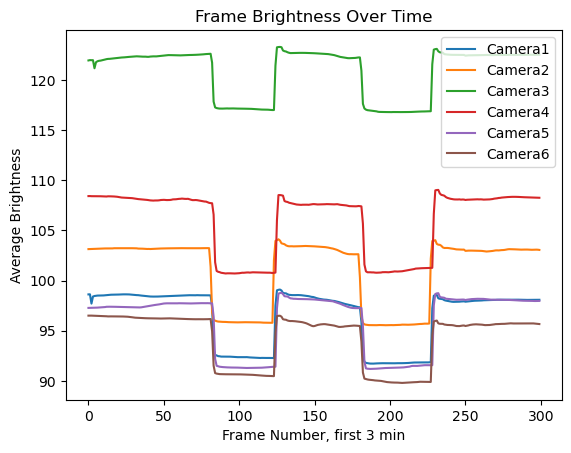

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test_miniscope: {'Camera1': [83, 182], 'Camera2': [82, 180, 181], 'Camera3': [83, 182], 'Camera4': [84, 183], 'Camera5': [84, 183], 'Camera6': [83, 182]}
Processed drop frames: {'Camera1': 83, 'Camera2': 82, 'Camera3': 83, 'Camera4': 84, 'Camera5': 84, 'Camera6': 83}
82
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test_miniscope/df_synced_2024_10_25_2male_mice_test_miniscope_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test_miniscope with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test_miniscope/2024_10_25_2male_mice_test_miniscope_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2male_mice_test_miniscope/2024_10_25_2male_mice_test_miniscope_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_25/2m

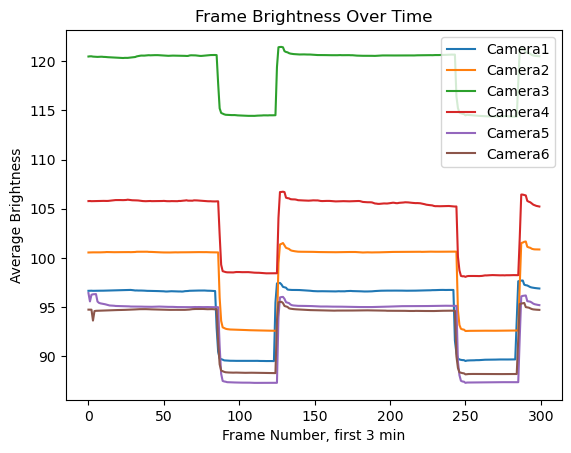

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_00: {'Camera1': [85, 86, 243], 'Camera2': [87, 88, 245], 'Camera3': [86, 87, 244], 'Camera4': [87, 88, 245], 'Camera5': [87, 88, 245], 'Camera6': [86, 87, 244]}
Processed drop frames: {'Camera1': 86, 'Camera2': 88, 'Camera3': 87, 'Camera4': 88, 'Camera5': 88, 'Camera6': 87}
86
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_00/df_synced_2024_10_29_2social_mini_0605pmc_single_18_00_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_00 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_00/2024_10_29_2social_mini_0605pmc_single_18_00_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_00/2024_10_29_2social_mini_0605pmc_single_18_00_

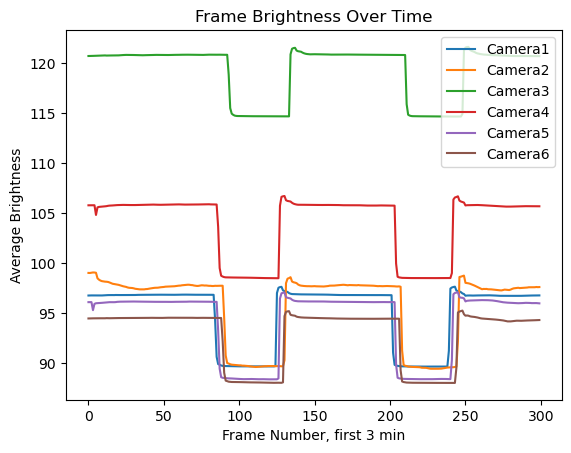

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_25: {'Camera1': [84, 85, 202], 'Camera2': [90, 91, 208], 'Camera3': [94, 211], 'Camera4': [86, 87, 204], 'Camera5': [86, 87, 204], 'Camera6': [89, 90, 207]}
Processed drop frames: {'Camera1': 85, 'Camera2': 91, 'Camera3': 94, 'Camera4': 87, 'Camera5': 87, 'Camera6': 90}
85
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_25/df_synced_2024_10_29_2social_mini_0605pmc_single_18_25_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_25 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_25/2024_10_29_2social_mini_0605pmc_single_18_25_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_25/2024_10_29_2social_mini_0605pmc_single_18_25_cali

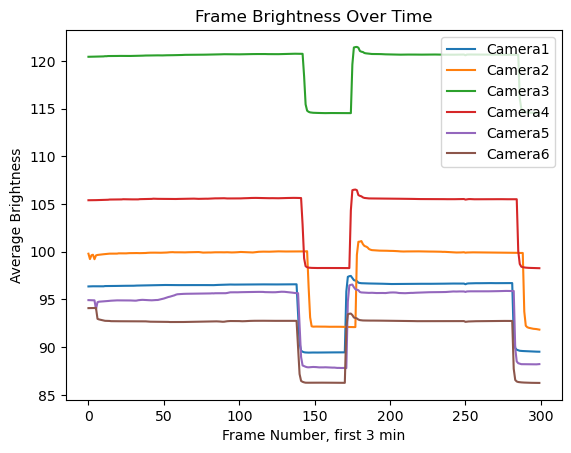

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_42: {'Camera1': [139, 140, 282], 'Camera2': [146, 147, 289], 'Camera3': [143, 144, 286], 'Camera4': [142, 143, 285], 'Camera5': [140, 141, 283], 'Camera6': [139, 140, 282]}
Processed drop frames: {'Camera1': 140, 'Camera2': 147, 'Camera3': 144, 'Camera4': 143, 'Camera5': 141, 'Camera6': 140}
140
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_42/df_synced_2024_10_29_2social_mini_0605pmc_single_18_42_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_42 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_42/2024_10_29_2social_mini_0605pmc_single_18_42_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_29/2social_mini_0605pmc_single_18_42/2024_10_29_2social_mini_06

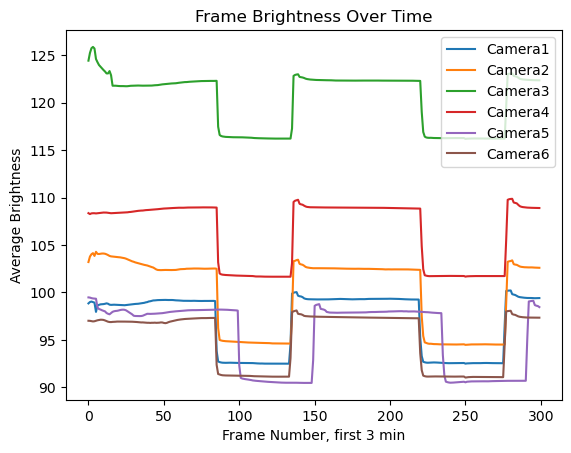

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_00: {'Camera1': [85, 220], 'Camera2': [86, 221, 222], 'Camera3': [86, 221, 222], 'Camera4': [86, 221, 222], 'Camera5': [100, 235, 236], 'Camera6': [85, 220]}
Processed drop frames: {'Camera1': 85, 'Camera2': 86, 'Camera3': 86, 'Camera4': 86, 'Camera5': 100, 'Camera6': 85}
85
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_00/df_synced_2024_10_30_2social_mini_0605pmc_single_15_00_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_00 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_00/2024_10_30_2social_mini_0605pmc_single_15_00_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_00/2024_10_30_2social_mini_0605pmc_single_15_00_ca

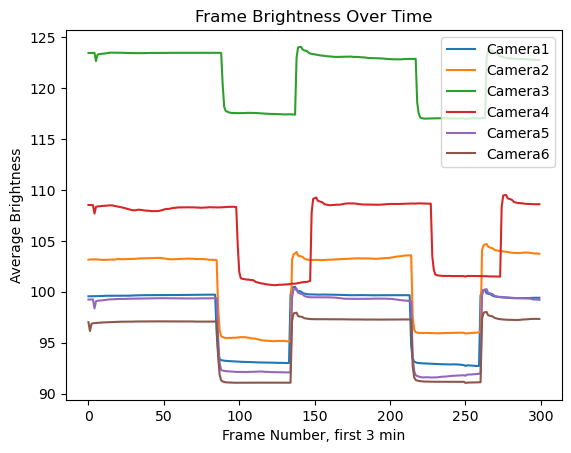

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_38: {'Camera1': [85, 86, 214], 'Camera2': [86, 87, 215], 'Camera3': [89, 90, 218], 'Camera4': [99, 100, 228], 'Camera5': [86, 87, 215], 'Camera6': [86, 215]}
Processed drop frames: {'Camera1': 86, 'Camera2': 87, 'Camera3': 90, 'Camera4': 100, 'Camera5': 87, 'Camera6': 86}
86
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_38/df_synced_2024_10_30_2social_mini_0605pmc_single_15_38_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_38 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_38/2024_10_30_2social_mini_0605pmc_single_15_38_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_38/2024_10_30_2social_mini_0605pmc_single_15_38_ca

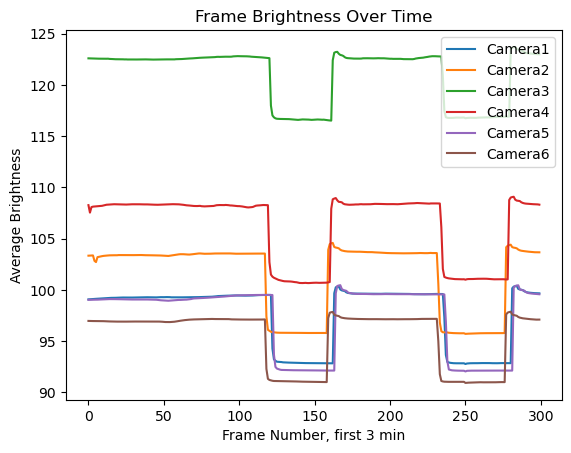

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_0605pmc_single_14_08: {'Camera1': [122, 236, 237], 'Camera2': [118, 232, 233], 'Camera3': [121, 236], 'Camera4': [120, 234, 235], 'Camera5': [123, 237, 238], 'Camera6': [118, 232, 233]}
Processed drop frames: {'Camera1': 122, 'Camera2': 118, 'Camera3': 121, 'Camera4': 120, 'Camera5': 123, 'Camera6': 118}
118
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_0605pmc_single_14_08/df_synced_2024_10_31_2social_mini_0605pmc_single_14_08_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_0605pmc_single_14_08 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_0605pmc_single_14_08/2024_10_31_2social_mini_0605pmc_single_14_08_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_0605pmc_single_14_08/2024_10_31_2social_mini_0605pmc

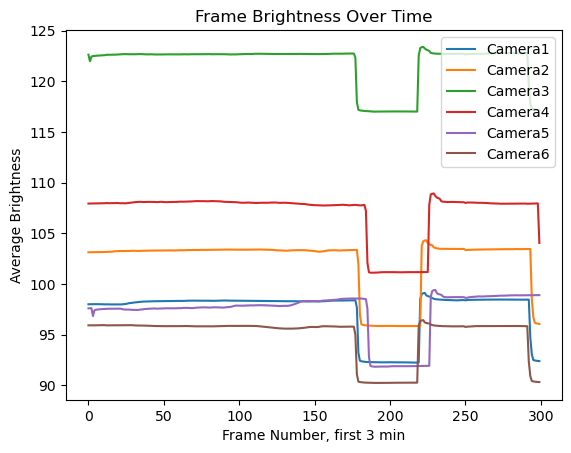

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_femalebleach_11_48: {'Camera1': [179, 293], 'Camera2': [180, 294], 'Camera3': [178, 292], 'Camera4': [185, 299], 'Camera5': [186], 'Camera6': [178, 292]}
Processed drop frames: {'Camera1': 179, 'Camera2': 180, 'Camera3': 178, 'Camera4': 185, 'Camera5': 186, 'Camera6': 178}
178
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_femalebleach_11_48/df_synced_2024_10_31_2social_mini_20240819V1r1_femalebleach_11_48_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_femalebleach_11_48 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_femalebleach_11_48/2024_10_31_2social_mini_20240819V1r1_femalebleach_11_48_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_fem

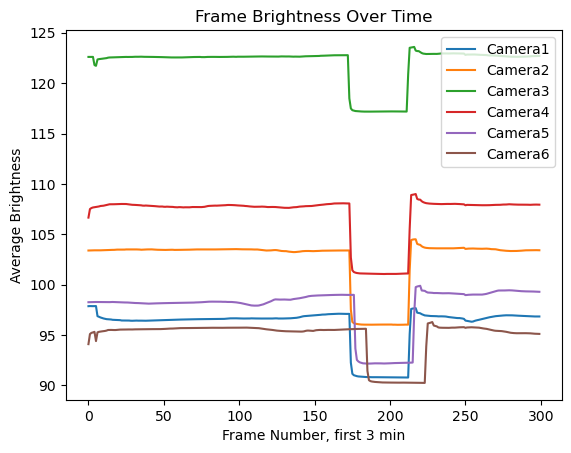

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29: {'Camera1': [174], 'Camera2': [174], 'Camera3': [173], 'Camera4': [174], 'Camera5': [177], 'Camera6': [185]}
Processed drop frames: {'Camera1': 174, 'Camera2': 174, 'Camera3': 173, 'Camera4': 174, 'Camera5': 177, 'Camera6': 185}
173
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29/df_synced_2024_10_31_2social_mini_20240819V1r1_single_11_29_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29/2024_10_31_2social_mini_20240819V1r1_single_11_29_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_10_31/2social_mini_20240819V1r1_single_11_29/2024_10_31_2social_mini_20240819V1r1_single_11_29_c

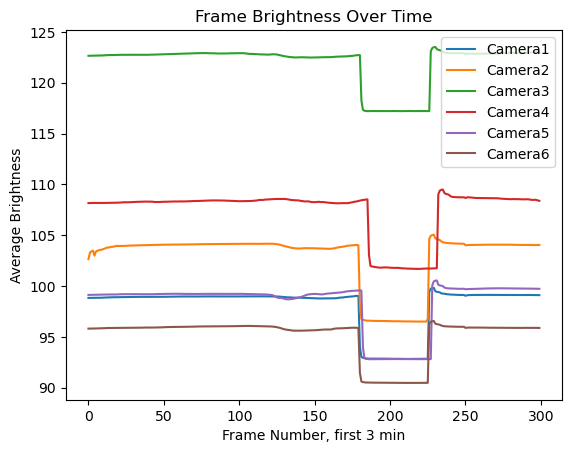

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240819V1r1_AO_14_56: {'Camera1': [180], 'Camera2': [180], 'Camera3': [181], 'Camera4': [186], 'Camera5': [182], 'Camera6': [180]}
Processed drop frames: {'Camera1': 180, 'Camera2': 180, 'Camera3': 181, 'Camera4': 186, 'Camera5': 182, 'Camera6': 180}
180
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240819V1r1_AO_14_56/df_synced_2024_11_01_20240819V1r1_AO_14_56_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240819V1r1_AO_14_56 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240819V1r1_AO_14_56/2024_11_01_20240819V1r1_AO_14_56_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240819V1r1_AO_14_56/2024_11_01_20240819V1r1_AO_14_56_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240819V1r1_AO_14_56/prev_calib
Sync ran successfully.


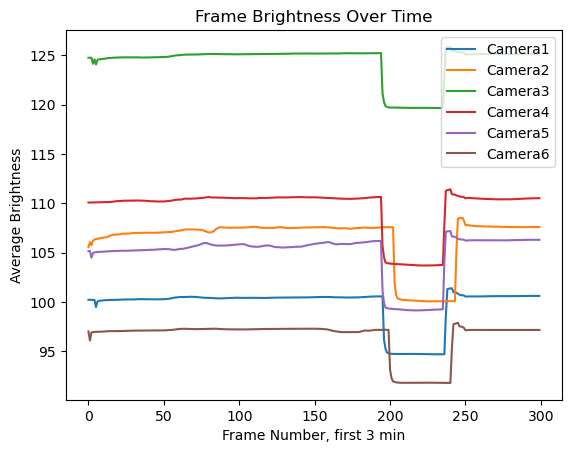

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50: {'Camera1': [196], 'Camera2': [203], 'Camera3': [195], 'Camera4': [195], 'Camera5': [195], 'Camera6': [200]}
Processed drop frames: {'Camera1': 196, 'Camera2': 203, 'Camera3': 195, 'Camera4': 195, 'Camera5': 195, 'Camera6': 200}
195
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50/df_synced_2024_11_01_20240910V1r_AO_12_50_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50/2024_11_01_20240910V1r_AO_12_50_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50/2024_11_01_20240910V1r_AO_12_50_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_AO_12_50/prev_calib
Sync ran successfully.
Updated P

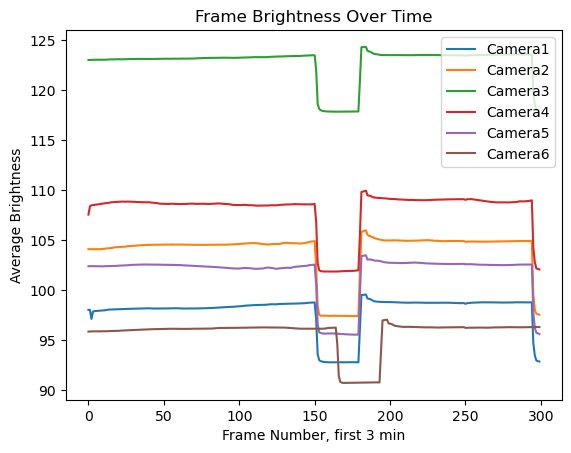

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_BO_11_35: {'Camera1': [152, 295], 'Camera2': [151, 152, 295], 'Camera3': [152, 295], 'Camera4': [152, 295], 'Camera5': [151, 152, 295], 'Camera6': [166]}
Processed drop frames: {'Camera1': 152, 'Camera2': 152, 'Camera3': 152, 'Camera4': 152, 'Camera5': 152, 'Camera6': 166}
152
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_BO_11_35/df_synced_2024_11_01_20240910V1r_BO_11_35_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_BO_11_35 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_BO_11_35/2024_11_01_20240910V1r_BO_11_35_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_BO_11_35/2024_11_01_20240910V1r_BO_11_35_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/20240910V1r_BO_11_35/prev_cal

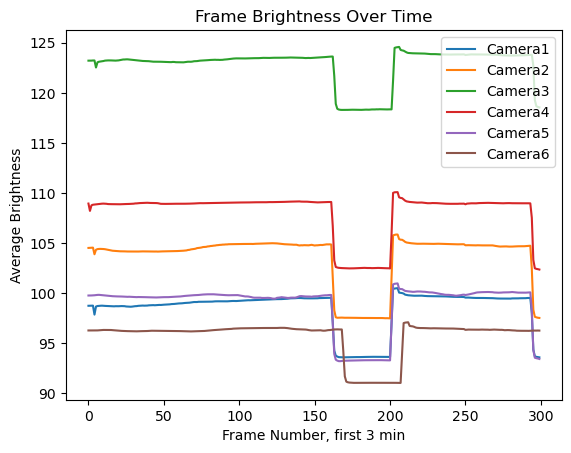

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240819V1r1_AO_single_14_30: {'Camera1': [162, 163, 295], 'Camera2': [162, 163, 294, 295], 'Camera3': [164, 296], 'Camera4': [162, 163, 295], 'Camera5': [162, 163, 295], 'Camera6': [169, 170]}
Processed drop frames: {'Camera1': 163, 'Camera2': 163, 'Camera3': 164, 'Camera4': 163, 'Camera5': 163, 'Camera6': 170}
163
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240819V1r1_AO_single_14_30/df_synced_2024_11_01_2social_mini_20240819V1r1_AO_single_14_30_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240819V1r1_AO_single_14_30 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240819V1r1_AO_single_14_30/2024_11_01_2social_mini_20240819V1r1_AO_single_14_30_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_2024

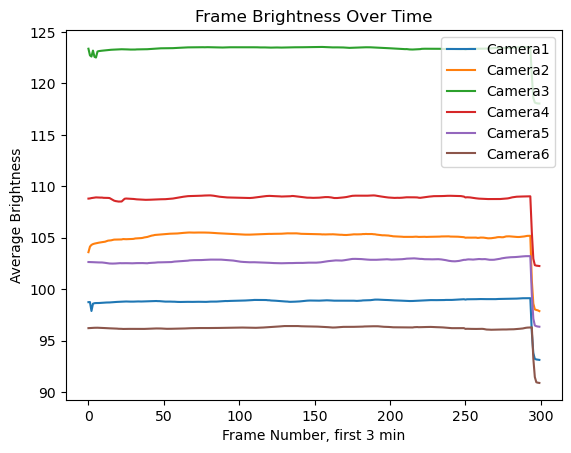

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50: {'Camera1': [294, 295], 'Camera2': [294, 295], 'Camera3': [294, 295], 'Camera4': [294, 295], 'Camera5': [294, 295], 'Camera6': [295]}
Processed drop frames: {'Camera1': 295, 'Camera2': 295, 'Camera3': 295, 'Camera4': 295, 'Camera5': 295, 'Camera6': 295}
295
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/df_synced_2024_11_01_2social_mini_20240910V1r_AO_single_12_50_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/2024_11_01_2social_mini_20240910V1r_AO_single_12_50_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_01/2social_mini_20240910V1r_AO_single_12_50/2024_11_01_2

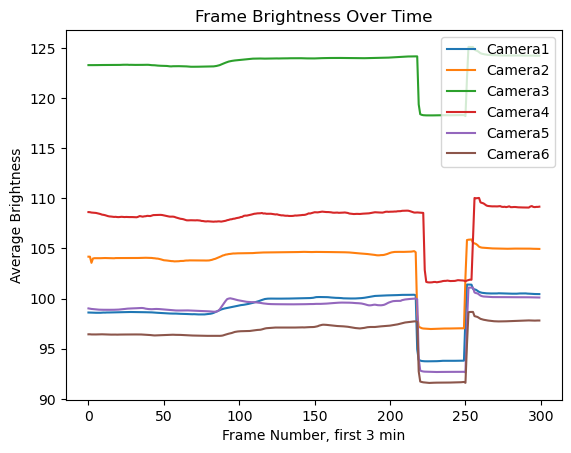

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr1_16_12: {'Camera1': [218], 'Camera2': [218], 'Camera3': [219], 'Camera4': [223], 'Camera5': [219], 'Camera6': [219]}
Processed drop frames: {'Camera1': 218, 'Camera2': 218, 'Camera3': 219, 'Camera4': 223, 'Camera5': 219, 'Camera6': 219}
218
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr1_16_12/df_synced_2024_11_06_20241015pmcr1_16_12_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr1_16_12 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr1_16_12/2024_11_06_20241015pmcr1_16_12_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr1_16_12/2024_11_06_20241015pmcr1_16_12_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr1_16_12/prev_calib
Sync ran successfully.
Updated Parquet fi

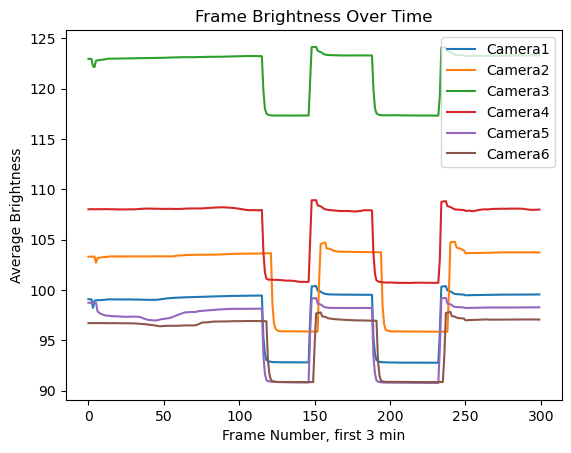

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53: {'Camera1': [116, 189], 'Camera2': [122, 195], 'Camera3': [116, 189], 'Camera4': [116, 117, 189, 190], 'Camera5': [116, 189], 'Camera6': [119, 192]}
Processed drop frames: {'Camera1': 116, 'Camera2': 122, 'Camera3': 116, 'Camera4': 117, 'Camera5': 116, 'Camera6': 119}
116
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53/df_synced_2024_11_06_20241015pmcr2_16_53_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53/2024_11_06_20241015pmcr2_16_53_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53/2024_11_06_20241015pmcr2_16_53_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_16_53/prev_calib
S

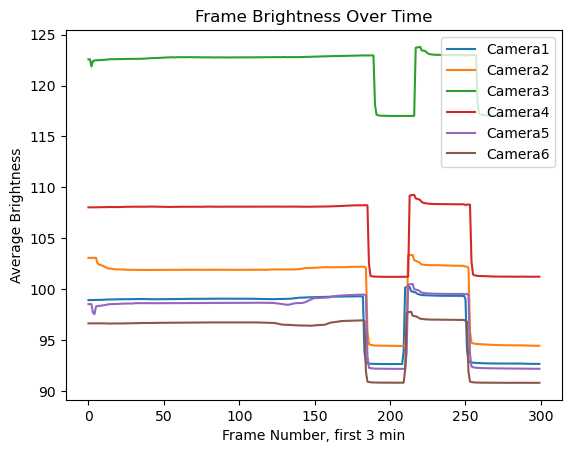

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_17_13: {'Camera1': [183, 251], 'Camera2': [185, 253], 'Camera3': [190, 258], 'Camera4': [186, 254], 'Camera5': [185, 253], 'Camera6': [184, 252]}
Processed drop frames: {'Camera1': 183, 'Camera2': 185, 'Camera3': 190, 'Camera4': 186, 'Camera5': 185, 'Camera6': 184}
183
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_17_13/df_synced_2024_11_06_20241015pmcr2_17_13_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_17_13 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_17_13/2024_11_06_20241015pmcr2_17_13_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_17_13/2024_11_06_20241015pmcr2_17_13_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_06/20241015pmcr2_17_13/prev_calib
Sync ran su

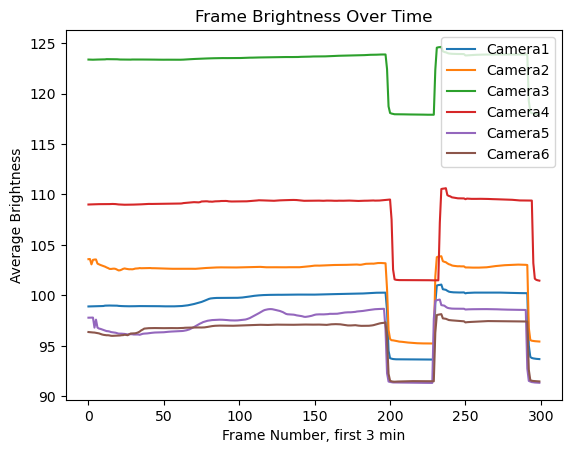

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/20241015pmcr2_AO_12_52: {'Camera1': [199, 292], 'Camera2': [198, 199, 292], 'Camera3': [199, 292], 'Camera4': [202, 295], 'Camera5': [197, 198, 291], 'Camera6': [199, 292]}
Processed drop frames: {'Camera1': 199, 'Camera2': 199, 'Camera3': 199, 'Camera4': 202, 'Camera5': 198, 'Camera6': 199}
198
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/20241015pmcr2_AO_12_52/df_synced_2024_11_07_20241015pmcr2_AO_12_52_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/20241015pmcr2_AO_12_52 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/20241015pmcr2_AO_12_52/2024_11_07_20241015pmcr2_AO_12_52_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/20241015pmcr2_AO_12_52/2024_11_07_20241015pmcr2_AO_12_52_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_07/20241015

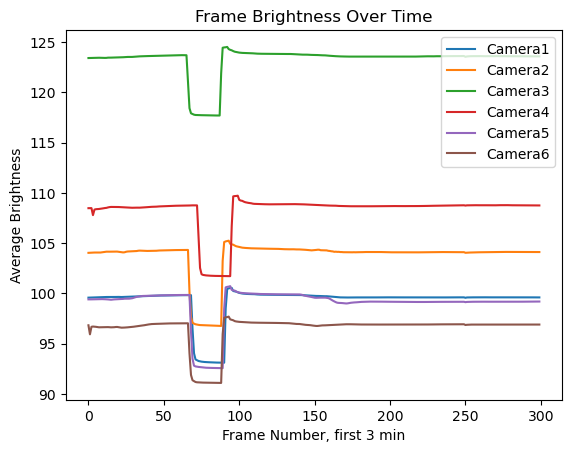

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/20240910v1r_cricket_cyliner_test_16_17: {'Camera1': [69, 70], 'Camera2': [67, 68], 'Camera3': [66, 67], 'Camera4': [73, 74], 'Camera5': [68, 69], 'Camera6': [67, 68]}
Processed drop frames: {'Camera1': 70, 'Camera2': 68, 'Camera3': 67, 'Camera4': 74, 'Camera5': 69, 'Camera6': 68}
67
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/20240910v1r_cricket_cyliner_test_16_17/df_synced_2024_11_13_20240910v1r_cricket_cyliner_test_16_17_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/20240910v1r_cricket_cyliner_test_16_17 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/20240910v1r_cricket_cyliner_test_16_17/2024_11_13_20240910v1r_cricket_cyliner_test_16_17_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/20240910v1r_cricket_cyliner_test_16_17/2024_11_13_20240910v1r_cricket_cyliner_t

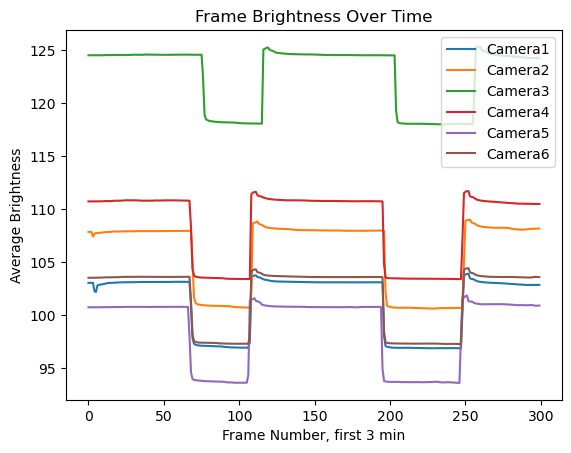

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/240605pmc_righthole_cricket_acrylic_test_15_05: {'Camera1': [68, 69, 196], 'Camera2': [69, 70, 197], 'Camera3': [76, 77, 204], 'Camera4': [68, 69, 196], 'Camera5': [67, 68, 195], 'Camera6': [68, 69, 196]}
Processed drop frames: {'Camera1': 69, 'Camera2': 70, 'Camera3': 77, 'Camera4': 69, 'Camera5': 68, 'Camera6': 69}
68
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/240605pmc_righthole_cricket_acrylic_test_15_05/df_synced_2024_11_13_240605pmc_righthole_cricket_acrylic_test_15_05_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/240605pmc_righthole_cricket_acrylic_test_15_05 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/240605pmc_righthole_cricket_acrylic_test_15_05/2024_11_13_240605pmc_righthole_cricket_acrylic_test_15_05_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_11_13/2

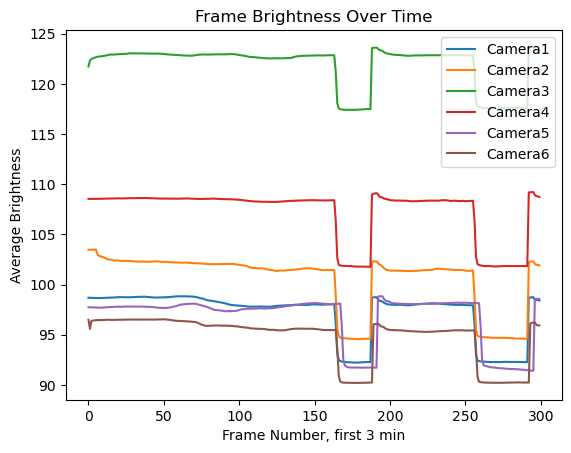

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_11/20240919v1l5r1mini_p20240820v1r2_social_test_14_55: {'Camera1': [165, 257], 'Camera2': [164, 165, 256, 257], 'Camera3': [165, 257], 'Camera4': [164, 165, 257], 'Camera5': [168, 169, 260, 261], 'Camera6': [166, 258]}
Processed drop frames: {'Camera1': 165, 'Camera2': 165, 'Camera3': 165, 'Camera4': 165, 'Camera5': 169, 'Camera6': 166}
165
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_11/20240919v1l5r1mini_p20240820v1r2_social_test_14_55/df_synced_2024_12_11_20240919v1l5r1mini_p20240820v1r2_social_test_14_55_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_11/20240919v1l5r1mini_p20240820v1r2_social_test_14_55 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_11/20240919v1l5r1mini_p20240820v1r2_social_test_14_55/2024_12_11_20240919v1l5r1mini_p20240820v1r2_social_test_14_55_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big

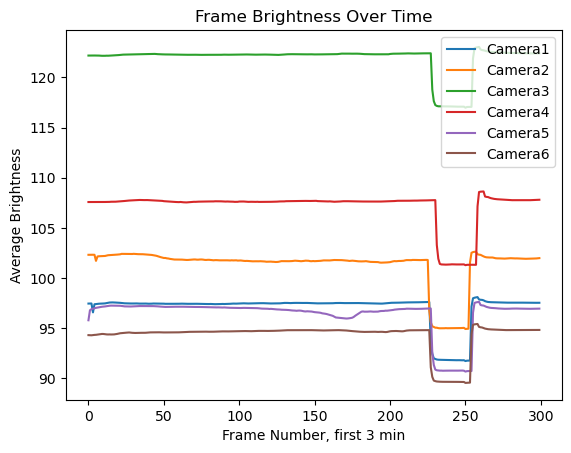

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_11/20240919v1l5r1mini_pfemale_social_test_15_35: {'Camera1': [227], 'Camera2': [226], 'Camera3': [228], 'Camera4': [231], 'Camera5': [228], 'Camera6': [227]}
Processed drop frames: {'Camera1': 227, 'Camera2': 226, 'Camera3': 228, 'Camera4': 231, 'Camera5': 228, 'Camera6': 227}
226
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_11/20240919v1l5r1mini_pfemale_social_test_15_35/df_synced_2024_12_11_20240919v1l5r1mini_pfemale_social_test_15_35_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_11/20240919v1l5r1mini_pfemale_social_test_15_35 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_11/20240919v1l5r1mini_pfemale_social_test_15_35/2024_12_11_20240919v1l5r1mini_pfemale_social_test_15_35_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_11/20240919v1l5r1mini_pfemale_social_test_15_35/2024_12_1

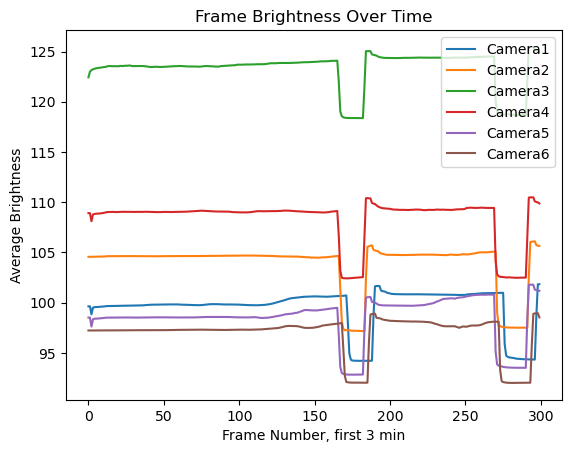

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_11_21: {'Camera1': [172, 173, 276], 'Camera2': [167, 168, 271], 'Camera3': [166, 167, 270], 'Camera4': [166, 167, 270], 'Camera5': [166, 167, 270], 'Camera6': [169, 170, 273]}
Processed drop frames: {'Camera1': 173, 'Camera2': 168, 'Camera3': 167, 'Camera4': 167, 'Camera5': 167, 'Camera6': 170}
167
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_11_21/df_synced_2024_12_18_20240919v1l5r1mini_11_21_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_11_21 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_11_21/2024_12_18_20240919v1l5r1mini_11_21_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_11_21/2024_12_18_20240919v1l5r1mini_11_21_calib_before_label3d_dannce.mat to /data/big_rim/rsyn

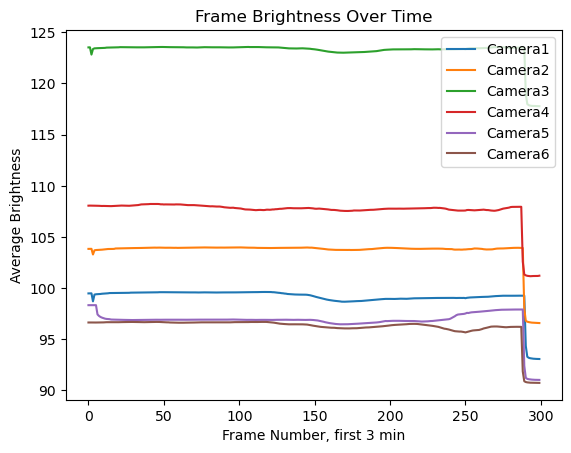

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_p20240717PMC_social_test_11_30: {'Camera1': [290], 'Camera2': [289], 'Camera3': [290], 'Camera4': [288], 'Camera5': [289], 'Camera6': [288]}
Processed drop frames: {'Camera1': 290, 'Camera2': 289, 'Camera3': 290, 'Camera4': 288, 'Camera5': 289, 'Camera6': 288}
288
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_p20240717PMC_social_test_11_30/df_synced_2024_12_18_20240919v1l5r1mini_p20240717PMC_social_test_11_30_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_p20240717PMC_social_test_11_30 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_p20240717PMC_social_test_11_30/2024_12_18_20240919v1l5r1mini_p20240717PMC_social_test_11_30_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r1mini_p2024

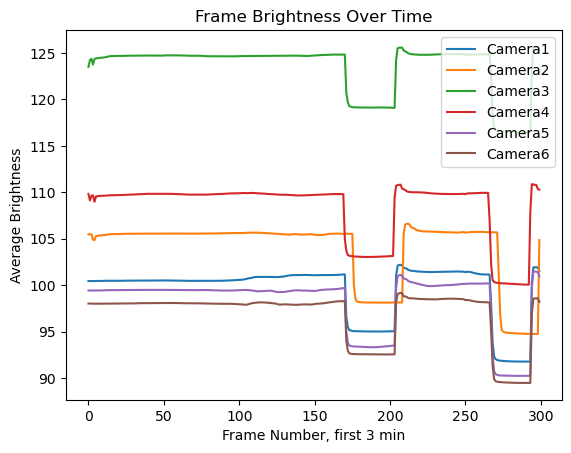

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_13_09: {'Camera1': [171, 267, 268], 'Camera2': [176, 272, 273], 'Camera3': [171, 267, 268], 'Camera4': [170, 266, 267], 'Camera5': [171, 267, 268], 'Camera6': [171, 267, 268]}
Processed drop frames: {'Camera1': 171, 'Camera2': 176, 'Camera3': 171, 'Camera4': 170, 'Camera5': 171, 'Camera6': 171}
170
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_13_09/df_synced_2024_12_18_20240919v1l5r2mini_13_09_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_13_09 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_13_09/2024_12_18_20240919v1l5r2mini_13_09_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_13_09/2024_12_18_20240919v1l5r2mini_13_09_calib_before_label3d_dannce.mat to /data/big_rim/rsyn

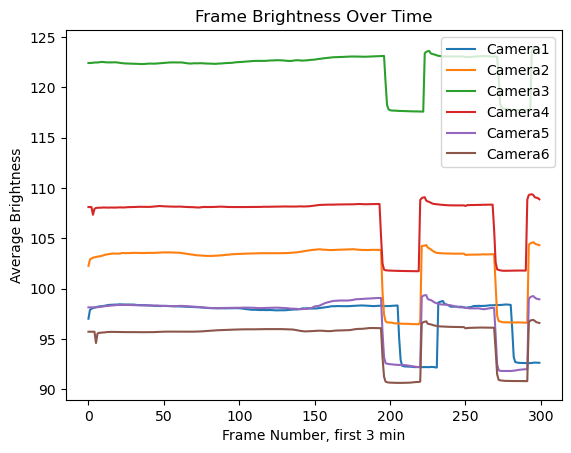

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_p20240521b1697576_social_test_13_26: {'Camera1': [206, 207, 281, 282], 'Camera2': [195, 196, 270, 271], 'Camera3': [197, 198, 272, 273], 'Camera4': [194, 195, 269, 270], 'Camera5': [195, 196, 270, 271], 'Camera6': [195, 270, 271]}
Processed drop frames: {'Camera1': 207, 'Camera2': 196, 'Camera3': 198, 'Camera4': 195, 'Camera5': 196, 'Camera6': 195}
195
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_p20240521b1697576_social_test_13_26/df_synced_2024_12_18_20240919v1l5r2mini_p20240521b1697576_social_test_13_26_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_p20240521b1697576_social_test_13_26 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_p20240521b1697576_social_test_13_26/2024_12_18_20240919v1l5r2mini_p20240521b1697576_social_test_13_26_calib_before_labe

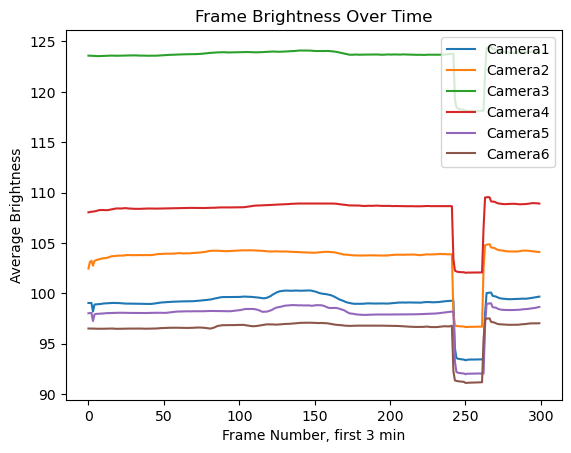

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_p20240717PMC_social_test_13_16: {'Camera1': [243], 'Camera2': [242], 'Camera3': [243], 'Camera4': [242], 'Camera5': [243], 'Camera6': [242]}
Processed drop frames: {'Camera1': 243, 'Camera2': 242, 'Camera3': 243, 'Camera4': 242, 'Camera5': 243, 'Camera6': 242}
242
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_p20240717PMC_social_test_13_16/df_synced_2024_12_18_20240919v1l5r2mini_p20240717PMC_social_test_13_16_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_p20240717PMC_social_test_13_16 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_p20240717PMC_social_test_13_16/2024_12_18_20240919v1l5r2mini_p20240717PMC_social_test_13_16_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_18/20240919v1l5r2mini_p2024

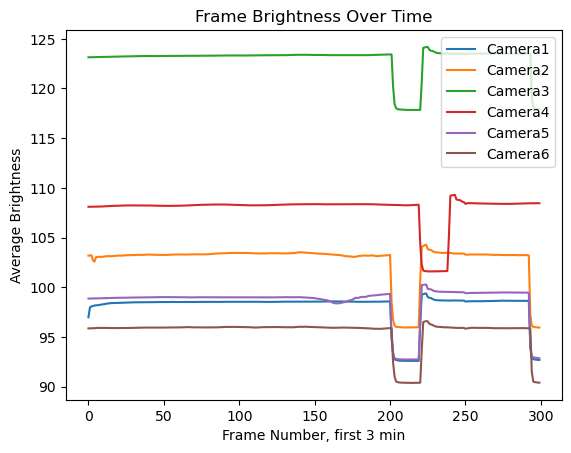

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r1mini_p20240717PMC_social_14_31: {'Camera1': [201, 293], 'Camera2': [201, 293], 'Camera3': [202, 294], 'Camera4': [220, 221], 'Camera5': [201, 293], 'Camera6': [202, 294]}
Processed drop frames: {'Camera1': 201, 'Camera2': 201, 'Camera3': 202, 'Camera4': 221, 'Camera5': 201, 'Camera6': 202}
201
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r1mini_p20240717PMC_social_14_31/df_synced_2024_12_31_20240919v1l5r1mini_p20240717PMC_social_14_31_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r1mini_p20240717PMC_social_14_31 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r1mini_p20240717PMC_social_14_31/2024_12_31_20240919v1l5r1mini_p20240717PMC_social_14_31_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r1mini_p2024

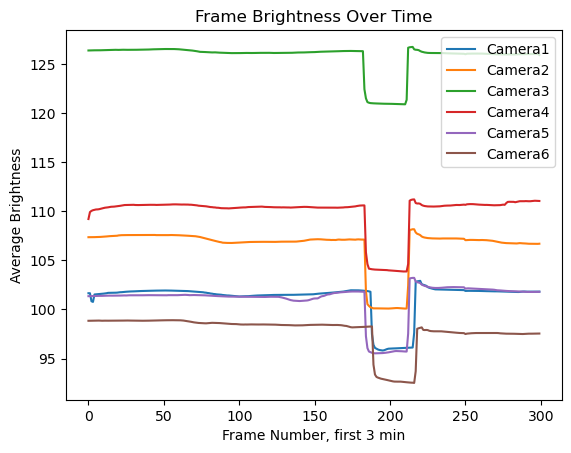

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_13_54: {'Camera1': [188], 'Camera2': [184], 'Camera3': [183], 'Camera4': [184], 'Camera5': [184], 'Camera6': [189]}
Processed drop frames: {'Camera1': 188, 'Camera2': 184, 'Camera3': 183, 'Camera4': 184, 'Camera5': 184, 'Camera6': 189}
183
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_13_54/df_synced_2024_12_31_20240919v1l5r2mini_13_54_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_13_54 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_13_54/2024_12_31_20240919v1l5r2mini_13_54_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_13_54/2024_12_31_20240919v1l5r2mini_13_54_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_13_54/prev_ca

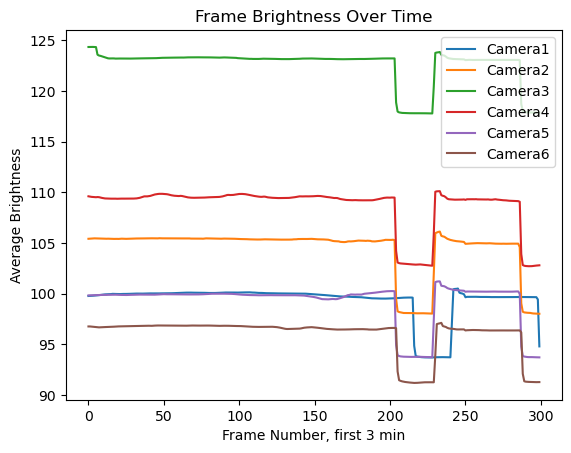

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_p20240717PMC_social_14_04: {'Camera1': [216, 299], 'Camera2': [204, 287], 'Camera3': [204, 287], 'Camera4': [204, 287], 'Camera5': [204, 287], 'Camera6': [205, 288]}
Processed drop frames: {'Camera1': 216, 'Camera2': 204, 'Camera3': 204, 'Camera4': 204, 'Camera5': 204, 'Camera6': 205}
204
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_p20240717PMC_social_14_04/df_synced_2024_12_31_20240919v1l5r2mini_p20240717PMC_social_14_04_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_p20240717PMC_social_14_04 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_p20240717PMC_social_14_04/2024_12_31_20240919v1l5r2mini_p20240717PMC_social_14_04_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20240919v1l5r2mini_p2024

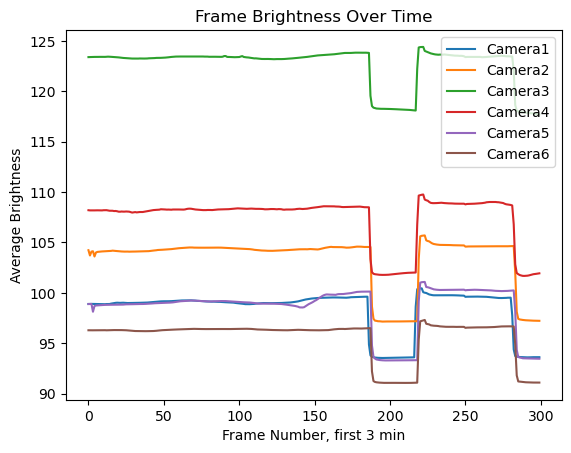

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r1mini_11_22: {'Camera1': [186, 282], 'Camera2': [188, 283, 284], 'Camera3': [187, 283], 'Camera4': [187, 283], 'Camera5': [188, 283, 284], 'Camera6': [188, 284]}
Processed drop frames: {'Camera1': 186, 'Camera2': 188, 'Camera3': 187, 'Camera4': 187, 'Camera5': 188, 'Camera6': 188}
186
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r1mini_11_22/df_synced_2024_12_31_20241212v1l1r1mini_11_22_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r1mini_11_22 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r1mini_11_22/2024_12_31_20241212v1l1r1mini_11_22_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r1mini_11_22/2024_12_31_20241212v1l1r1mini_11_22_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/202

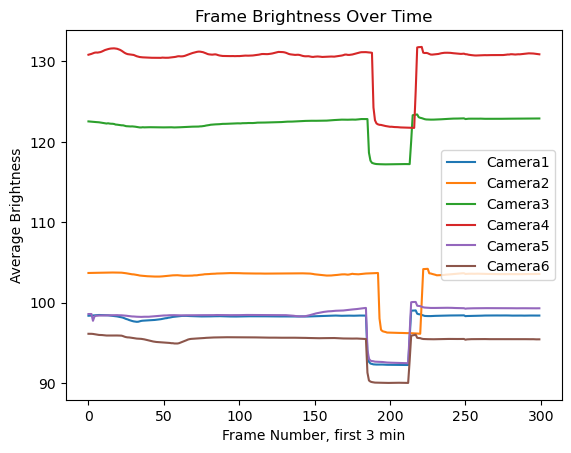

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_12_04: {'Camera1': [185], 'Camera2': [193], 'Camera3': [186], 'Camera4': [189], 'Camera5': [185], 'Camera6': [185]}
Processed drop frames: {'Camera1': 185, 'Camera2': 193, 'Camera3': 186, 'Camera4': 189, 'Camera5': 185, 'Camera6': 185}
185
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_12_04/df_synced_2024_12_31_20241212v1l1r2mini_12_04_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_12_04 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_12_04/2024_12_31_20241212v1l1r2mini_12_04_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_12_04/2024_12_31_20241212v1l1r2mini_12_04_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_12_04/prev_ca

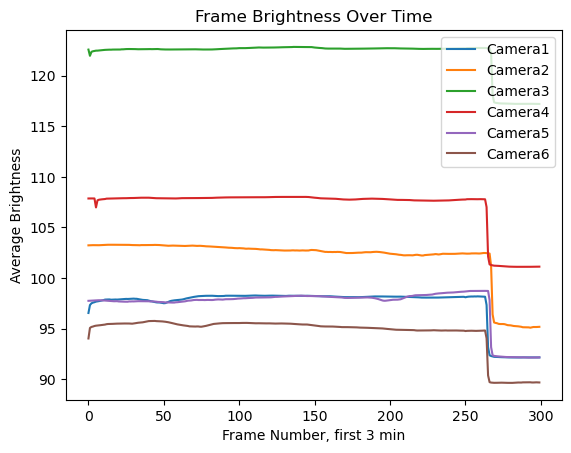

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_p20241111_social_12_16: {'Camera1': [265], 'Camera2': [268], 'Camera3': [268], 'Camera4': [265], 'Camera5': [267], 'Camera6': [265]}
Processed drop frames: {'Camera1': 265, 'Camera2': 268, 'Camera3': 268, 'Camera4': 265, 'Camera5': 267, 'Camera6': 265}
265
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_p20241111_social_12_16/df_synced_2024_12_31_20241212v1l1r2mini_p20241111_social_12_16_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_p20241111_social_12_16 with /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_p20241111_social_12_16/2024_12_31_20241212v1l1r2mini_p20241111_social_12_16_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2024_12_31/20241212v1l1r2mini_p20241111_social_12_16/2024_12_31_20241212v1l1r2mini_

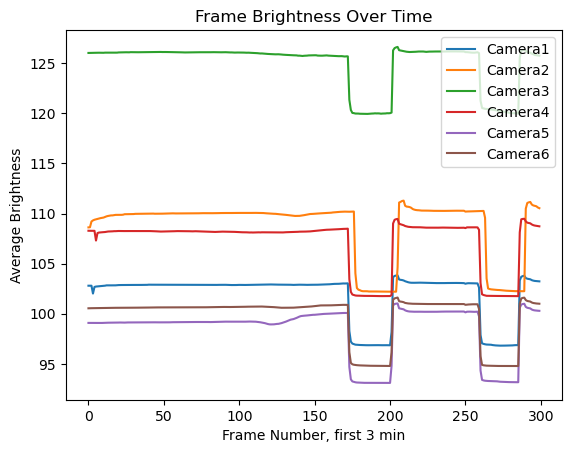

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_44: {'Camera1': [173, 260], 'Camera2': [177, 264], 'Camera3': [173, 260], 'Camera4': [173, 260], 'Camera5': [173, 260], 'Camera6': [173, 260]}
Processed drop frames: {'Camera1': 173, 'Camera2': 177, 'Camera3': 173, 'Camera4': 173, 'Camera5': 173, 'Camera6': 173}
173
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_44/df_synced_2025_02_12_20241001PMCRE2mini_13_44_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_44 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_44/2025_02_12_20241001PMCRE2mini_13_44_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_44/2025_02_12_20241001PMCRE2mini_13_44_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20

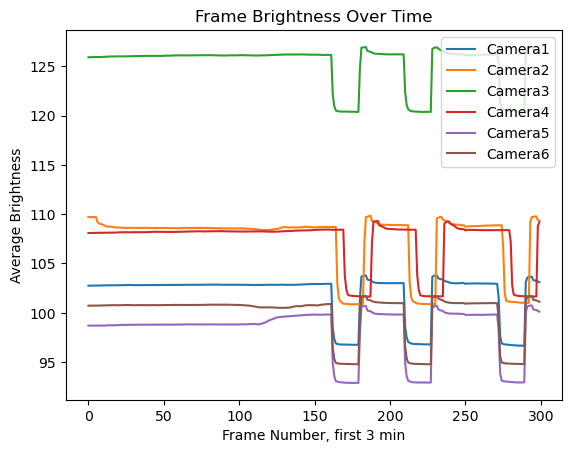

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_57: {'Camera1': [162, 210, 273], 'Camera2': [165, 213, 275, 276], 'Camera3': [162, 210, 273], 'Camera4': [170, 218, 281], 'Camera5': [162, 210, 273], 'Camera6': [162, 210, 273]}
Processed drop frames: {'Camera1': 162, 'Camera2': 165, 'Camera3': 162, 'Camera4': 170, 'Camera5': 162, 'Camera6': 162}
162
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_57/df_synced_2025_02_12_20241001PMCRE2mini_13_57_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_57 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_57/2025_02_12_20241001PMCRE2mini_13_57_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_13_57/2025_02_12_20241001PMCRE2mini_13_57_calib_before_label3d_dannce.mat to /data/big_rim

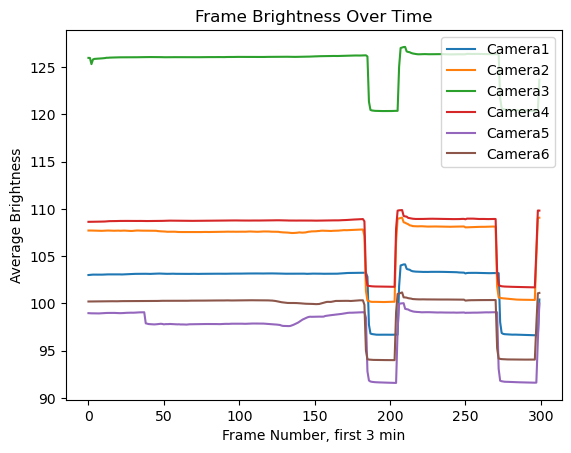

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_22: {'Camera1': [186, 273], 'Camera2': [184, 271], 'Camera3': [186, 273], 'Camera4': [184, 271], 'Camera5': [185, 272], 'Camera6': [184, 271]}
Processed drop frames: {'Camera1': 186, 'Camera2': 184, 'Camera3': 186, 'Camera4': 184, 'Camera5': 185, 'Camera6': 184}
184
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_22/df_synced_2025_02_12_20241001PMCRE2mini_15_22_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_22 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_22/2025_02_12_20241001PMCRE2mini_15_22_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_22/2025_02_12_20241001PMCRE2mini_15_22_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20

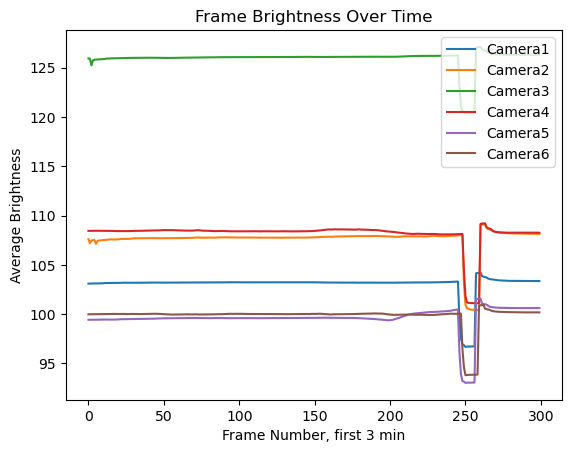

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_35: {'Camera1': [246], 'Camera2': [249, 250], 'Camera3': [246, 247], 'Camera4': [249, 250], 'Camera5': [246, 247], 'Camera6': [248]}
Processed drop frames: {'Camera1': 246, 'Camera2': 250, 'Camera3': 247, 'Camera4': 250, 'Camera5': 247, 'Camera6': 248}
246
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_35/df_synced_2025_02_12_20241001PMCRE2mini_15_35_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_35 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_35/2025_02_12_20241001PMCRE2mini_15_35_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCRE2mini_15_35/2025_02_12_20241001PMCRE2mini_15_35_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_12/20241001PMCR

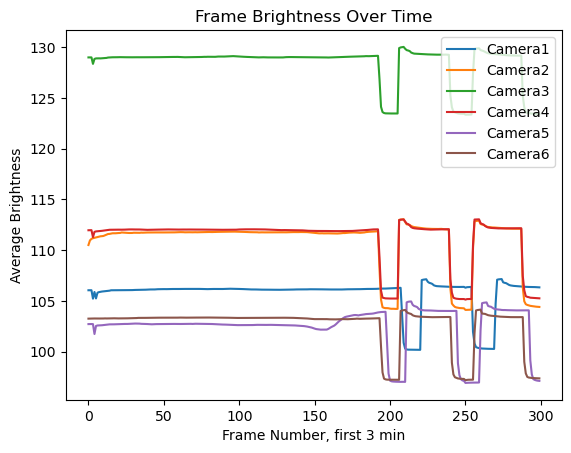

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_06: {'Camera1': [208, 209, 255], 'Camera2': [193, 194, 240, 288], 'Camera3': [193, 194, 240, 288], 'Camera4': [193, 194, 240, 288], 'Camera5': [198, 199, 245, 293], 'Camera6': [194, 195, 241, 289]}
Processed drop frames: {'Camera1': 209, 'Camera2': 194, 'Camera3': 194, 'Camera4': 194, 'Camera5': 199, 'Camera6': 195}
194
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_06/df_synced_2025_02_13_20241225PMCLE1mini_11_06_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_06 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_06/2025_02_13_20241225PMCLE1mini_11_06_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_06/2025_02_13_20241225PMCLE1mini_11_06_calib_before_label3d_dannce.

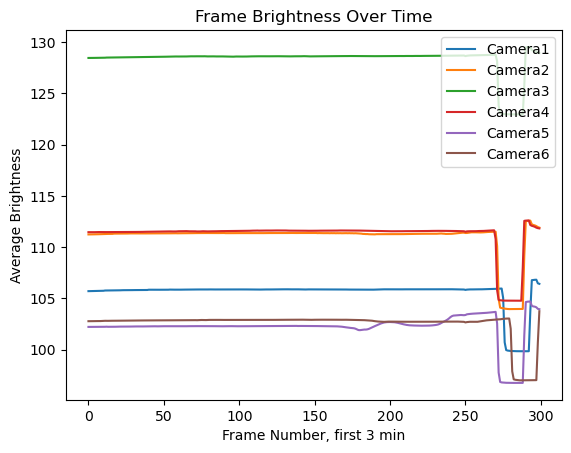

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_37: {'Camera1': [276], 'Camera2': [272], 'Camera3': [272], 'Camera4': [271], 'Camera5': [272], 'Camera6': [281]}
Processed drop frames: {'Camera1': 276, 'Camera2': 272, 'Camera3': 272, 'Camera4': 271, 'Camera5': 272, 'Camera6': 281}
271
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_37/df_synced_2025_02_13_20241225PMCLE1mini_11_37_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_37 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_37/2025_02_13_20241225PMCLE1mini_11_37_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_37/2025_02_13_20241225PMCLE1mini_11_37_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_37/prev_ca

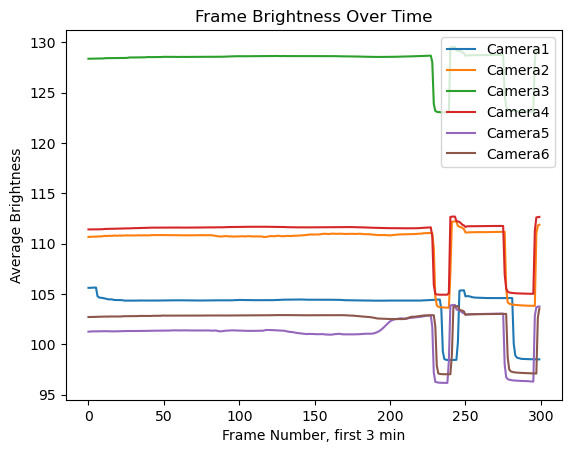

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_57: {'Camera1': [235, 282], 'Camera2': [230, 277], 'Camera3': [229, 276], 'Camera4': [229, 276], 'Camera5': [229, 276], 'Camera6': [231, 278]}
Processed drop frames: {'Camera1': 235, 'Camera2': 230, 'Camera3': 229, 'Camera4': 229, 'Camera5': 229, 'Camera6': 231}
229
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_57/df_synced_2025_02_13_20241225PMCLE1mini_11_57_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_57 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_57/2025_02_13_20241225PMCLE1mini_11_57_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20241225PMCLE1mini_11_57/2025_02_13_20241225PMCLE1mini_11_57_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_13/20

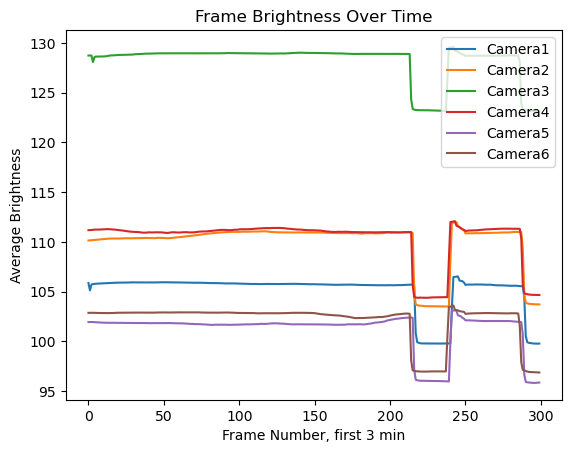

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241002PMCLE1mini_p20241001RE2_14_10: {'Camera1': [217, 290], 'Camera2': [216, 289], 'Camera3': [214, 287], 'Camera4': [215, 288], 'Camera5': [216, 289], 'Camera6': [214, 287]}
Processed drop frames: {'Camera1': 217, 'Camera2': 216, 'Camera3': 214, 'Camera4': 215, 'Camera5': 216, 'Camera6': 214}
214
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241002PMCLE1mini_p20241001RE2_14_10/df_synced_2025_02_27_20241002PMCLE1mini_p20241001RE2_14_10_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241002PMCLE1mini_p20241001RE2_14_10 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241002PMCLE1mini_p20241001RE2_14_10/2025_02_27_20241002PMCLE1mini_p20241001RE2_14_10_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241002PMCLE1mini_p20241001RE2_14_10/2025_02_27_20241002PMCLE1min

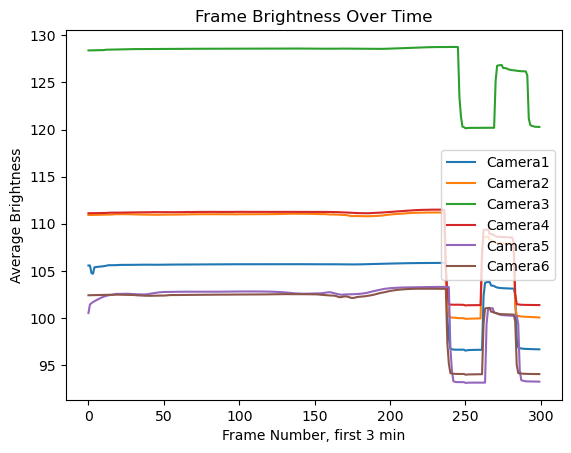

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_12_24: {'Camera1': [238, 239, 284], 'Camera2': [237, 238, 283], 'Camera3': [246, 247, 292], 'Camera4': [237, 238, 283], 'Camera5': [240, 241, 286], 'Camera6': [238, 239, 284]}
Processed drop frames: {'Camera1': 239, 'Camera2': 238, 'Camera3': 247, 'Camera4': 238, 'Camera5': 241, 'Camera6': 239}
238
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_12_24/df_synced_2025_02_27_20241015PMCBE1mini_12_24_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_12_24 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_12_24/2025_02_27_20241015PMCBE1mini_12_24_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_12_24/2025_02_27_20241015PMCBE1mini_12_24_calib_before_label3d_dannce.mat to /data/big_rim/rsyn

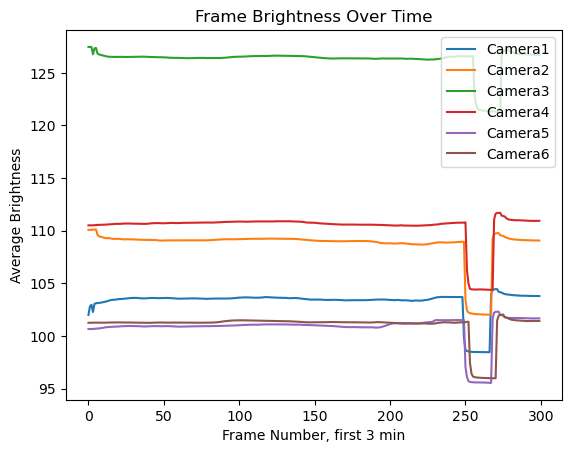

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_p20241015PMCRE1_12_33: {'Camera1': [249], 'Camera2': [250], 'Camera3': [256], 'Camera4': [251], 'Camera5': [250], 'Camera6': [253]}
Processed drop frames: {'Camera1': 249, 'Camera2': 250, 'Camera3': 256, 'Camera4': 251, 'Camera5': 250, 'Camera6': 253}
249
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_p20241015PMCRE1_12_33/df_synced_2025_02_27_20241015PMCBE1mini_p20241015PMCRE1_12_33_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_p20241015PMCRE1_12_33 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_p20241015PMCRE1_12_33/2025_02_27_20241015PMCBE1mini_p20241015PMCRE1_12_33_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_02_27/20241015PMCBE1mini_p20241015PMCRE1_12_33/2025_02_27_20241015PMCBE1mini_p202410

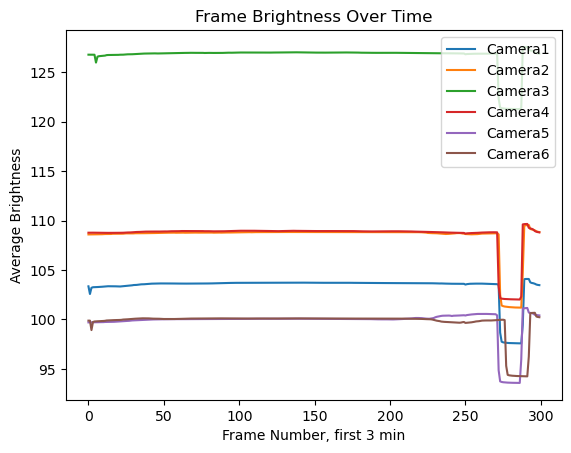

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1_14_12: {'Camera1': [273], 'Camera2': [273], 'Camera3': [272], 'Camera4': [272], 'Camera5': [272], 'Camera6': [277]}
Processed drop frames: {'Camera1': 273, 'Camera2': 273, 'Camera3': 272, 'Camera4': 272, 'Camera5': 272, 'Camera6': 277}
272
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1_14_12/df_synced_2025_03_11_20241224PMCLE1_14_12_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1_14_12 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1_14_12/2025_03_11_20241224PMCLE1_14_12_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1_14_12/2025_03_11_20241224PMCLE1_14_12_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1_14_12/prev_calib
Sync ran successfully.
Updated P

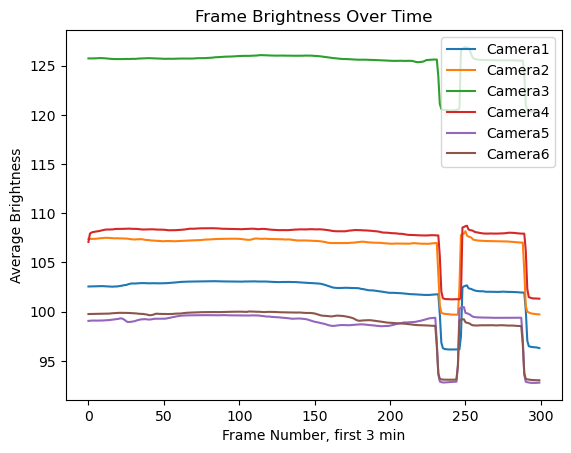

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1mini_p20240303PMC2_14_44: {'Camera1': [233, 234, 291], 'Camera2': [232, 233, 289, 290], 'Camera3': [233, 290], 'Camera4': [233, 234, 291], 'Camera5': [231, 232, 288, 289], 'Camera6': [231, 232, 289]}
Processed drop frames: {'Camera1': 234, 'Camera2': 233, 'Camera3': 233, 'Camera4': 234, 'Camera5': 232, 'Camera6': 232}
232
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1mini_p20240303PMC2_14_44/df_synced_2025_03_11_20241224PMCLE1mini_p20240303PMC2_14_44_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1mini_p20240303PMC2_14_44 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1mini_p20240303PMC2_14_44/2025_03_11_20241224PMCLE1mini_p20240303PMC2_14_44_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_03_11/20241224PMCLE1mini_p20240

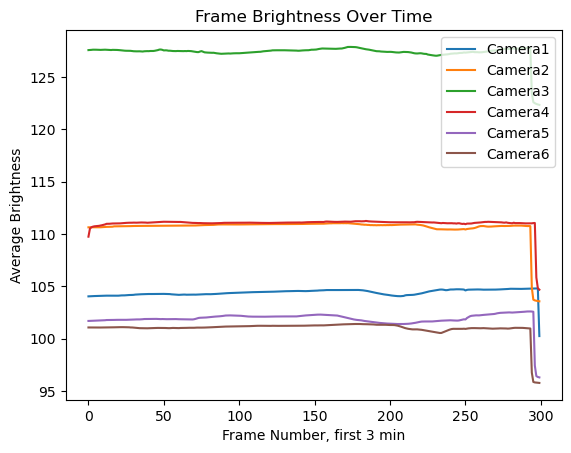

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_04_10/20241212V1RE1L23Fmini_p20241212V1LE1L23F: {'Camera1': [299], 'Camera2': [294], 'Camera3': [294], 'Camera4': [297], 'Camera5': [296], 'Camera6': [294]}
Processed drop frames: {'Camera1': 299, 'Camera2': 294, 'Camera3': 294, 'Camera4': 297, 'Camera5': 296, 'Camera6': 294}
294
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_04_10/20241212V1RE1L23Fmini_p20241212V1LE1L23F/df_synced_2025_04_10_20241212V1RE1L23Fmini_p20241212V1LE1L23F_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_04_10/20241212V1RE1L23Fmini_p20241212V1LE1L23F with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_04_10/20241212V1RE1L23Fmini_p20241212V1LE1L23F/2025_04_10_20241212V1RE1L23Fmini_p20241212V1LE1L23F_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_04_10/20241212V1RE1L23Fmini_p20241212V1LE1L23F/2025_04_10_20241212V1RE1L23Fmini_p202

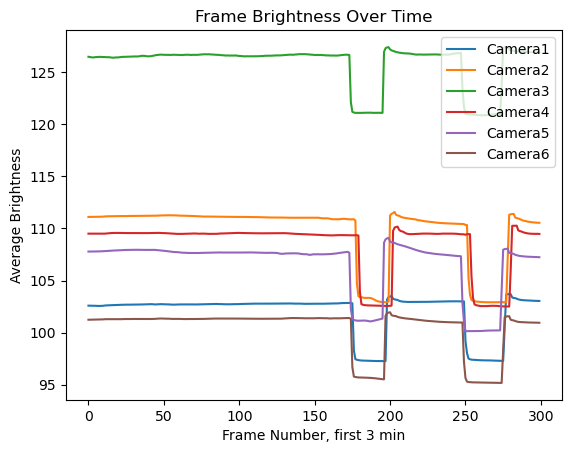

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_45: {'Camera1': [176, 250], 'Camera2': [178, 252], 'Camera3': [174, 248], 'Camera4': [180, 254, 255], 'Camera5': [174, 248], 'Camera6': [175, 249]}
Processed drop frames: {'Camera1': 176, 'Camera2': 178, 'Camera3': 174, 'Camera4': 180, 'Camera5': 174, 'Camera6': 175}
174
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_45/df_synced_2025_05_01_20250324PMCB_14_45_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_45 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_45/2025_05_01_20250324PMCB_14_45_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_45/2025_05_01_20250324PMCB_14_45_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCB_14_45/prev_calib
Sync ran succes

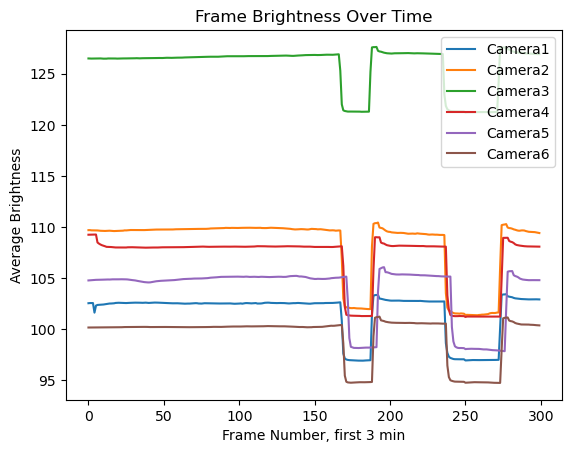

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCBmini_psamecageBE0_14_53: {'Camera1': [169, 237], 'Camera2': [168, 169, 237], 'Camera3': [168, 236], 'Camera4': [170, 238], 'Camera5': [172, 173, 241], 'Camera6': [170, 238]}
Processed drop frames: {'Camera1': 169, 'Camera2': 169, 'Camera3': 168, 'Camera4': 170, 'Camera5': 173, 'Camera6': 170}
168
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCBmini_psamecageBE0_14_53/df_synced_2025_05_01_20250324PMCBmini_psamecageBE0_14_53_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCBmini_psamecageBE0_14_53 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCBmini_psamecageBE0_14_53/2025_05_01_20250324PMCBmini_psamecageBE0_14_53_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCBmini_psamecageBE0_14_53/2025_05_01_20250324PMCBmini_psam

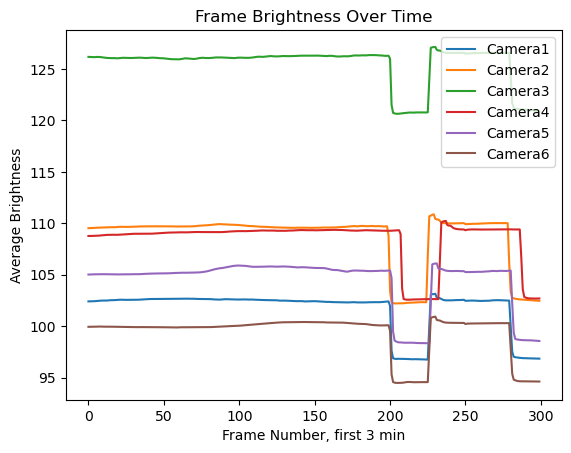

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCBmini_psamecageLE2_15_09: {'Camera1': [201, 280, 281], 'Camera2': [200, 279, 280], 'Camera3': [201, 280, 281], 'Camera4': [208, 287, 288], 'Camera5': [202, 281, 282], 'Camera6': [201, 280, 281]}
Processed drop frames: {'Camera1': 201, 'Camera2': 200, 'Camera3': 201, 'Camera4': 208, 'Camera5': 202, 'Camera6': 201}
200
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCBmini_psamecageLE2_15_09/df_synced_2025_05_01_20250324PMCBmini_psamecageLE2_15_09_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCBmini_psamecageLE2_15_09 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCBmini_psamecageLE2_15_09/2025_05_01_20250324PMCBmini_psamecageLE2_15_09_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_01/20250324PMCBmini_psamecageLE2_15_09/2025_05_01_2

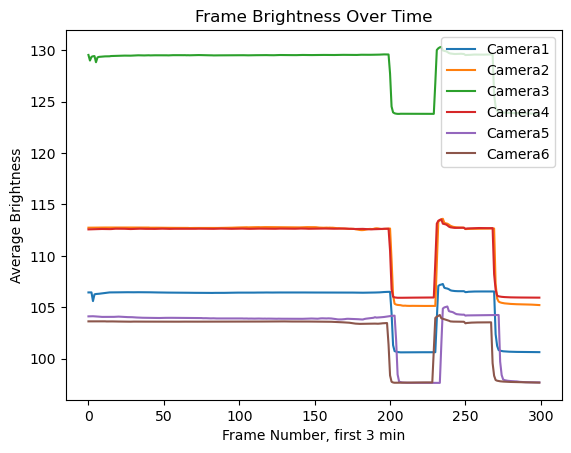

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1F: {'Camera1': [201, 202, 270], 'Camera2': [201, 202, 270], 'Camera3': [201, 269], 'Camera4': [200, 201, 269], 'Camera5': [204, 205, 273], 'Camera6': [199, 200, 268]}
Processed drop frames: {'Camera1': 202, 'Camera2': 202, 'Camera3': 201, 'Camera4': 201, 'Camera5': 205, 'Camera6': 200}
200
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1F/df_synced_2025_05_07_20241216V1RE1F_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1F with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1F/2025_05_07_20241216V1RE1F_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1F/2025_05_07_20241216V1RE1F_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1F/prev_calib
Sync ran successfully.
Updated 

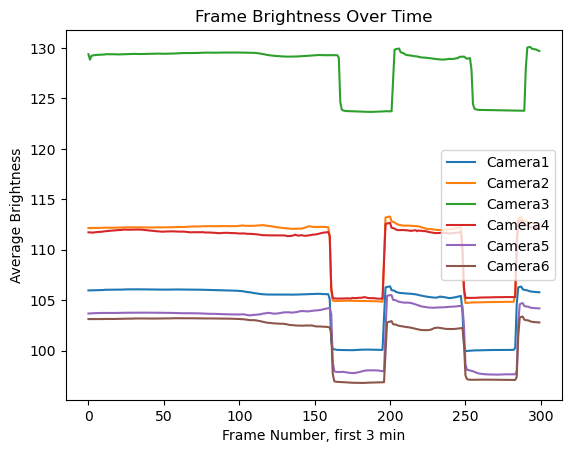

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1Fmini_p202241216V1BE1F: {'Camera1': [161, 249], 'Camera2': [161, 248, 249], 'Camera3': [167, 255], 'Camera4': [161, 249], 'Camera5': [162, 250], 'Camera6': [162, 250]}
Processed drop frames: {'Camera1': 161, 'Camera2': 161, 'Camera3': 167, 'Camera4': 161, 'Camera5': 162, 'Camera6': 162}
161
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1Fmini_p202241216V1BE1F/df_synced_2025_05_07_20241216V1RE1Fmini_p202241216V1BE1F_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1Fmini_p202241216V1BE1F with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1Fmini_p202241216V1BE1F/2025_05_07_20241216V1RE1Fmini_p202241216V1BE1F_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_07/20241216V1RE1Fmini_p202241216V1BE1F/2025_05_07_20241216V1RE1Fmini_p202241

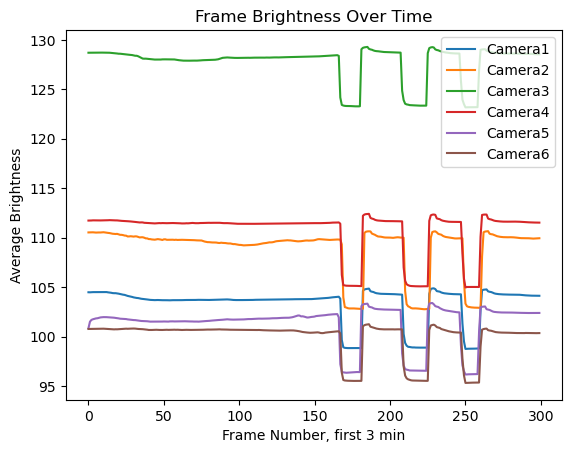

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0: {'Camera1': [168, 209, 248], 'Camera2': [169, 210, 249, 250], 'Camera3': [167, 208, 247], 'Camera4': [168, 209, 248, 249], 'Camera5': [167, 208, 247, 248], 'Camera6': [168, 209, 248]}
Processed drop frames: {'Camera1': 168, 'Camera2': 169, 'Camera3': 167, 'Camera4': 168, 'Camera5': 167, 'Camera6': 168}
167
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0/df_synced_2025_05_14_20240324PMCBE0_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0/2025_05_14_20240324PMCBE0_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0/2025_05_14_20240324PMCBE0_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0/prev_calib
Sync ran su

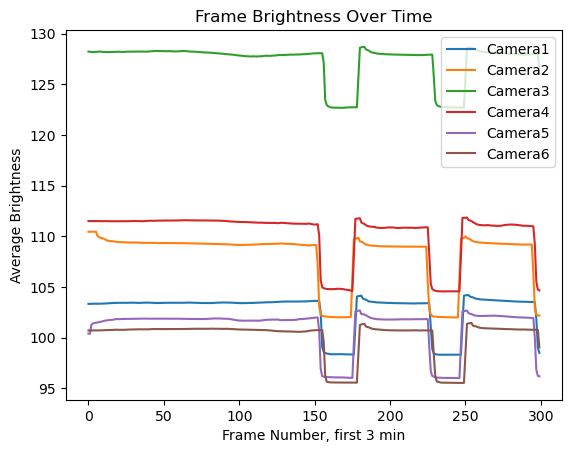

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0mini_p20250324LE1: {'Camera1': [155, 227, 228, 298], 'Camera2': [153, 225, 226, 295, 296], 'Camera3': [157, 229, 230], 'Camera4': [154, 226, 227, 297], 'Camera5': [154, 226, 227, 297], 'Camera6': [157, 229, 230]}
Processed drop frames: {'Camera1': 155, 'Camera2': 153, 'Camera3': 157, 'Camera4': 154, 'Camera5': 154, 'Camera6': 157}
153
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0mini_p20250324LE1/df_synced_2025_05_14_20240324PMCBE0mini_p20250324LE1_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0mini_p20250324LE1 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0mini_p20250324LE1/2025_05_14_20240324PMCBE0mini_p20250324LE1_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20240324PMCBE0mini_p20250324LE1/2025_05_14_2024

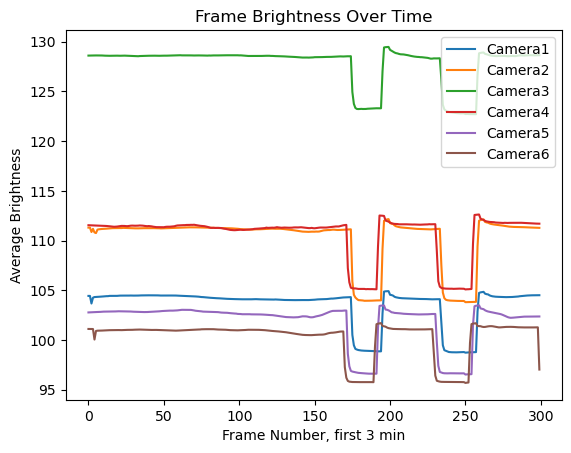

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCB: {'Camera1': [175, 234, 235], 'Camera2': [175, 234, 235], 'Camera3': [175, 234, 235], 'Camera4': [172, 231, 232], 'Camera5': [172, 231, 232], 'Camera6': [170, 229, 230, 299]}
Processed drop frames: {'Camera1': 175, 'Camera2': 175, 'Camera3': 175, 'Camera4': 172, 'Camera5': 172, 'Camera6': 170}
170
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCB/df_synced_2025_05_14_20250324PMCB_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCB with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCB/2025_05_14_20250324PMCB_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCB/2025_05_14_20250324PMCB_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCB/prev_calib
Sync ran successfully.
Updated Parquet 

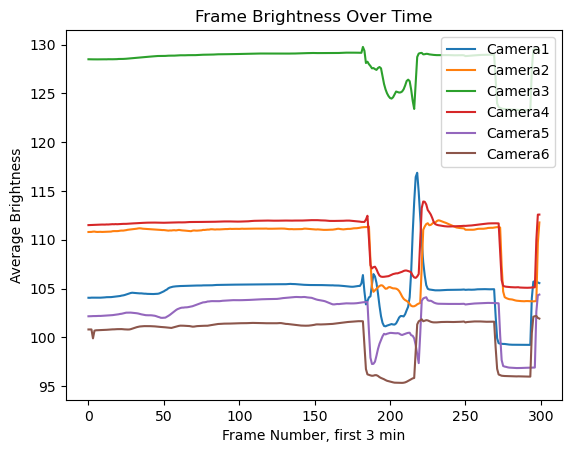

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCBmini_p20250324LE1: {'Camera1': [220, 221, 222, 270, 271], 'Camera2': [187, 188, 274, 275], 'Camera3': [270, 271], 'Camera4': [186, 187, 273, 274], 'Camera5': [186, 187, 273, 274], 'Camera6': [183, 184, 270, 271]}
Processed drop frames: {'Camera1': 221, 'Camera2': 188, 'Camera3': 271, 'Camera4': 187, 'Camera5': 187, 'Camera6': 184}
184
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCBmini_p20250324LE1/df_synced_2025_05_14_20250324PMCBmini_p20250324LE1_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCBmini_p20250324LE1 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCBmini_p20250324LE1/2025_05_14_20250324PMCBmini_p20250324LE1_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_14/20250324PMCBmini_p20250324LE1/2025_05_14_20250324PMCBmini_p

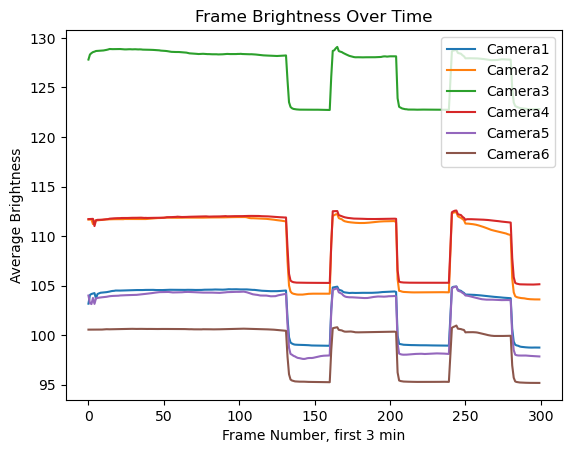

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated: {'Camera1': [132, 205, 281], 'Camera2': [132, 133, 205, 281], 'Camera3': [132, 133, 205, 281], 'Camera4': [132, 133, 205, 281], 'Camera5': [132, 133, 205, 281], 'Camera6': [132, 205, 281]}
Processed drop frames: {'Camera1': 132, 'Camera2': 133, 'Camera3': 133, 'Camera4': 133, 'Camera5': 133, 'Camera6': 132}
132
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated/df_synced_2025_05_16_20240303PMCBE0r1coated_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated/2025_05_16_20240303PMCBE0r1coated_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated/2025_05_16_20240303PMCBE0r1coated_calib_before_label3d_dannce.mat to /data/big_rim/

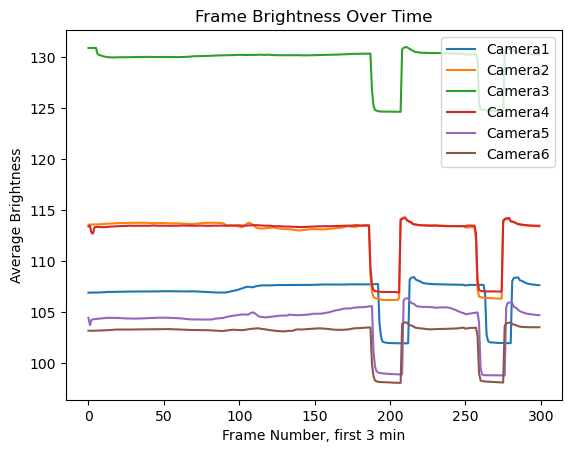

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated_14_53: {'Camera1': [193, 264], 'Camera2': [187, 258], 'Camera3': [188, 259], 'Camera4': [187, 258], 'Camera5': [189, 260], 'Camera6': [188, 259]}
Processed drop frames: {'Camera1': 193, 'Camera2': 187, 'Camera3': 188, 'Camera4': 187, 'Camera5': 189, 'Camera6': 188}
187
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated_14_53/df_synced_2025_05_16_20240303PMCBE0r1coated_14_53_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated_14_53 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated_14_53/2025_05_16_20240303PMCBE0r1coated_14_53_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coated_14_53/2025_05_16_20240303PMCBE0r1coated_14_53_calib_before_label3d_dannce.mat to /data/big_rim/rs

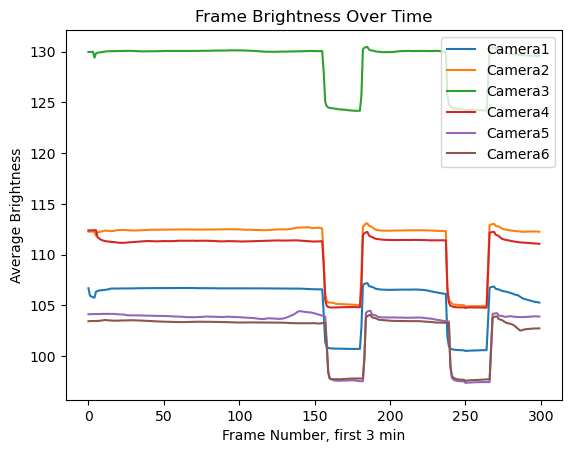

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coatedmini_p20240303RE1: {'Camera1': [156, 157, 238], 'Camera2': [156, 157, 238], 'Camera3': [156, 157, 238], 'Camera4': [156, 157, 238], 'Camera5': [158, 159, 240], 'Camera6': [158, 159, 240]}
Processed drop frames: {'Camera1': 157, 'Camera2': 157, 'Camera3': 157, 'Camera4': 157, 'Camera5': 159, 'Camera6': 159}
157
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coatedmini_p20240303RE1/df_synced_2025_05_16_20240303PMCBE0r1coatedmini_p20240303RE1_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coatedmini_p20240303RE1 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coatedmini_p20240303RE1/2025_05_16_20240303PMCBE0r1coatedmini_p20240303RE1_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20240303PMCBE0r1coatedmi

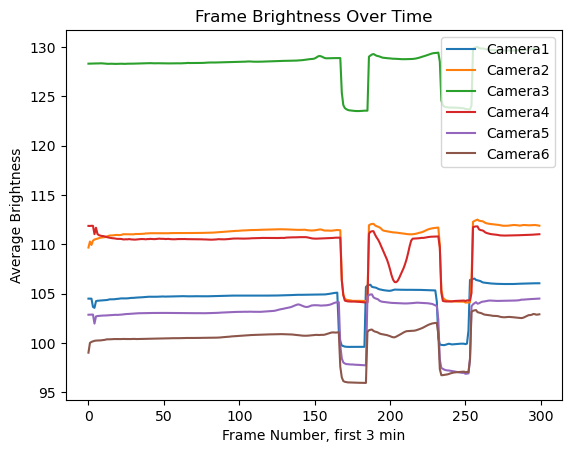

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F: {'Camera1': [166, 232], 'Camera2': [168, 234], 'Camera3': [168, 234], 'Camera4': [168, 234], 'Camera5': [167, 233], 'Camera6': [167, 233]}
Processed drop frames: {'Camera1': 166, 'Camera2': 168, 'Camera3': 168, 'Camera4': 168, 'Camera5': 167, 'Camera6': 167}
166
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F/df_synced_2025_05_16_20241216V1RE1F_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F/2025_05_16_20241216V1RE1F_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F/2025_05_16_20241216V1RE1F_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F/prev_calib
Sync ran successfully.
Updated Parquet file at /data/big

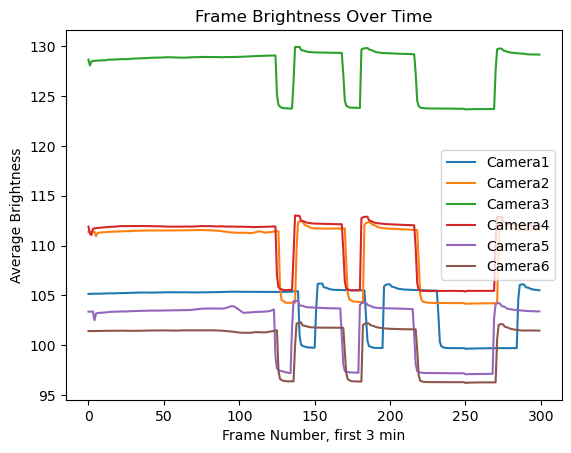

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F_15_16: {'Camera1': [140, 184, 185, 232, 233], 'Camera2': [127, 171, 172, 219, 220], 'Camera3': [125, 169, 170, 218], 'Camera4': [125, 169, 170, 217, 218], 'Camera5': [124, 168, 169, 216, 217], 'Camera6': [126, 170, 171, 218, 219]}
Processed drop frames: {'Camera1': 140, 'Camera2': 127, 'Camera3': 125, 'Camera4': 125, 'Camera5': 124, 'Camera6': 126}
124
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F_15_16/df_synced_2025_05_16_20241216V1RE1F_15_16_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F_15_16 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F_15_16/2025_05_16_20241216V1RE1F_15_16_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1F_15_16/2025_05_16_20241216V1RE1F_15_16_calib_before_label3d_dannce.ma

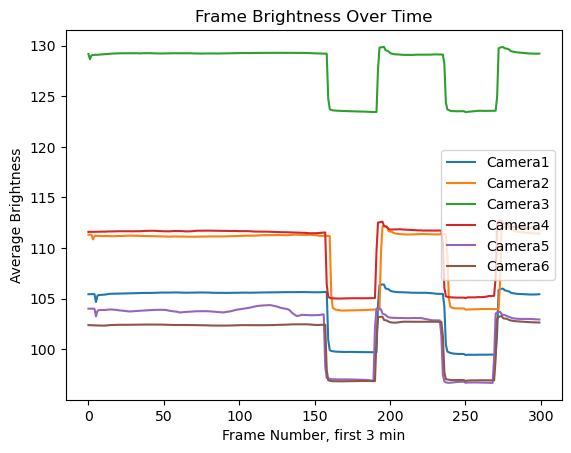

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1Fmini_p20241216RE2: {'Camera1': [159, 237], 'Camera2': [161, 238, 239], 'Camera3': [159, 237], 'Camera4': [158, 236], 'Camera5': [157, 235], 'Camera6': [158, 236]}
Processed drop frames: {'Camera1': 159, 'Camera2': 161, 'Camera3': 159, 'Camera4': 158, 'Camera5': 157, 'Camera6': 158}
157
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1Fmini_p20241216RE2/df_synced_2025_05_16_20241216V1RE1Fmini_p20241216RE2_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1Fmini_p20241216RE2 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1Fmini_p20241216RE2/2025_05_16_20241216V1RE1Fmini_p20241216RE2_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1Fmini_p20241216RE2/2025_05_16_20241216V1RE1Fmini_p20241216RE2_calib_before_label3d_d

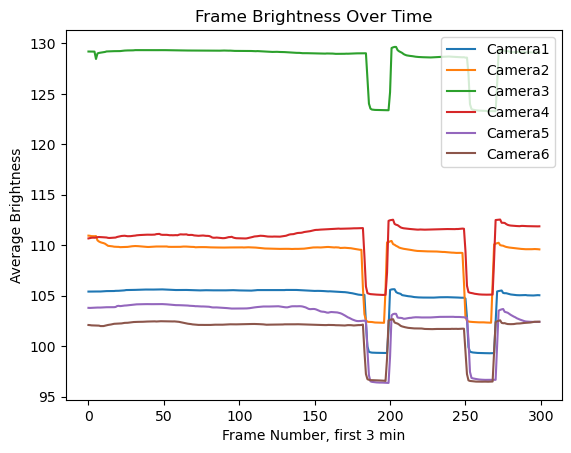

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1Fmini_p20241224PMCLE1: {'Camera1': [184, 185, 252], 'Camera2': [182, 183, 249, 250], 'Camera3': [185, 186, 253], 'Camera4': [183, 184, 250, 251], 'Camera5': [185, 186, 252, 253], 'Camera6': [183, 184, 250, 251]}
Processed drop frames: {'Camera1': 185, 'Camera2': 183, 'Camera3': 186, 'Camera4': 184, 'Camera5': 186, 'Camera6': 184}
183
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1Fmini_p20241224PMCLE1/df_synced_2025_05_16_20241216V1RE1Fmini_p20241224PMCLE1_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1Fmini_p20241224PMCLE1 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1Fmini_p20241224PMCLE1/2025_05_16_20241216V1RE1Fmini_p20241224PMCLE1_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_16/20241216V1RE1Fmini_p20241224PMCLE1

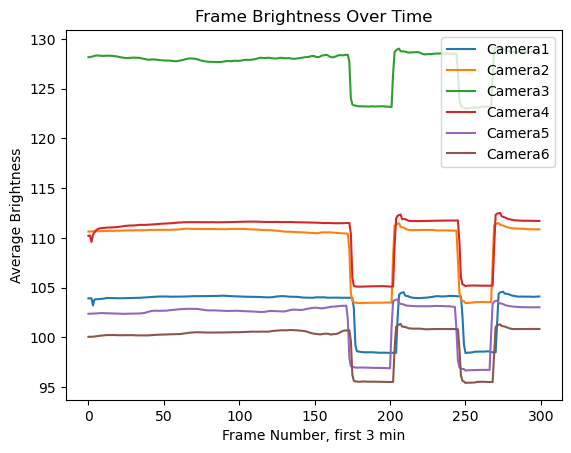

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1: {'Camera1': [177, 249], 'Camera2': [174, 245, 246], 'Camera3': [174, 246], 'Camera4': [175, 246, 247], 'Camera5': [173, 244, 245], 'Camera6': [175, 247]}
Processed drop frames: {'Camera1': 177, 'Camera2': 174, 'Camera3': 174, 'Camera4': 175, 'Camera5': 173, 'Camera6': 175}
173
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1/df_synced_2025_05_21_20241217v1l23re1_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1/2025_05_21_20241217v1l23re1_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1/2025_05_21_20241217v1l23re1_calib_before_label3d_dannce.mat to /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1/prev_calib
Sync ran successfully.


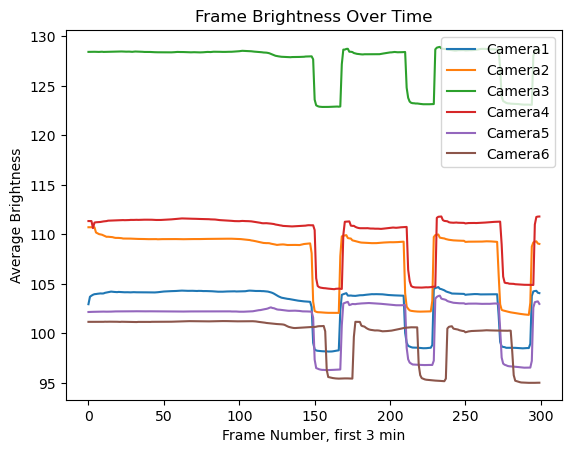

Detected intensity drop frames in /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1_p20241217v1l23BE0: {'Camera1': [149, 210, 272, 273], 'Camera2': [149, 210, 272, 273], 'Camera3': [150, 211, 274], 'Camera4': [151, 212, 274, 275], 'Camera5': [150, 211, 273, 274], 'Camera6': [158, 219, 281, 282]}
Processed drop frames: {'Camera1': 149, 'Camera2': 149, 'Camera3': 150, 'Camera4': 151, 'Camera5': 150, 'Camera6': 158}
149
alined data saved to: /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1_p20241217v1l23BE0/df_synced_2025_05_21_20241217v1l23re1_p20241217v1l23BE0_calib_before_label3d_dannce.mat
Alignment successful for /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1_p20241217v1l23BE0 with /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1_p20241217v1l23BE0/2025_05_21_20241217v1l23re1_p20241217v1l23BE0_calib_before_label3d_dannce.mat 
Moved prior calibration file /data/big_rim/rsync_dcc_sum/Oct3V1/2025_05_21/20241217v1l23re1_p20241217v1l

In [16]:
from utlis.exe_engine_utlis.comb_all_exe import sequential_process_and_update_sync

sequential_process_and_update_sync(filtered_table, base_folder)

In [ ]:
import os
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import datetime
import sys
sys.path.append(os.path.abspath('../..'))
# from utlis.sync_utlis.sync_df_utlis import process_sync
from utlis.exe_engine_utlis.exe_single_utlis import rerun_with_prev_calib

# Function to process each "unit" (rec_file) and update its status in the corresponding Parquet file sequentially
def process_unit_and_update_status(rec_file_data, base_folder):
    date_folder = rec_file_data['date_folder']
    rec_file = rec_file_data['rec_file']
    
    # Generate the paths needed for processing
    combined_path = os.path.join(base_folder, date_folder, rec_file)
    calib_path = rec_file_data.get('calib_path', os.path.join(base_folder, 'calib_before'))
    
    if not calib_path:
        print(f'No calib folder found. Aborting. {combined_path}')
        return
    
    output_file = f'{os.path.basename(date_folder)}_{rec_file}_{os.path.basename(calib_path)}_label3d_dannce.mat'
    print(f"Processing: {combined_path}")
    
    # Call the sync processing function
    sync_status = rerun_with_prev_calib(combined_path, threshold=2, max_frames=300) #base_folder, threshold=3, max_frames=100, min_frame=0):
    if sync_status is True:
        print("Sync ran successfully.")
    else:
        print(f"please mannually process {combined_path}")

    # Update the status in the Parquet file
    parquet_file_path = os.path.join(base_folder, date_folder, rec_file, "folder_log.parquet")

    try:
        table = pq.read_table(parquet_file_path)
        df = table.to_pandas()
    except FileNotFoundError:
        print(f"Parquet file not found at {parquet_file_path}")
        return
    
    # status = '1' if sync_status else '3'
    status = '3' if not sync_status else '1'
    if status == '3':
        print(f"Failed processing: {combined_path}, status set to 3.")
    
    # Update status and scan_time
    df['sync'] = status
    df['scan_time'] = datetime.datetime.now().isoformat()

    # Write back to the Parquet file
    updated_table = pa.Table.from_pandas(df)
    pq.write_table(updated_table, parquet_file_path)
    print(f"Updated Parquet file at {parquet_file_path} with new status.")
   
# Sequentially process and update the status for each rec_file
def sequential_process_and_update(filtered_table, base_folder):
    filtered_df = filtered_table.to_pandas()
    
    for _, row in filtered_df.iterrows():
        process_unit_and_update_status(row.to_dict(), base_folder)

# Example function call
# filtered_table_for_sync = [...]  # Your filtered PyArrow table here
# base_folder = '/path/to/your/base_folder'
sequential_process_and_update(filtered_table, base_folder)
